Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Minh Nguyen"
COLLABORATORS = "NA"

---


# CS110 Fall 2019 - Assignment 1
# Divide and Conquer Sorting Algorithms

This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

Every CS110 assignment begins with a check-up on your class responsibilities and professional standing, as well as your ability to address one of the course LOs #ComputationalSolutions. Thus to complete the first part of this assignment, you will need to take a screenshot of your CS110 dashboard on Forum where the following is visible:
your name.
your absences for the course have been set to excused up to session 2.2 (inclusively).
This will be evidence that you have submitted acceptable pre-class and make-up work for a CS110 session you may have missed. Check the specific CS110 make-up and pre-class policies in the syllabus of the course.


**NOTES:**

1. Your assignment submission needs to include the following resources:
    * A PDF file must be the first resource. This file must be generated from the template notebook where you have written all of the answers (check this link for instructions on how to do this). Make sure that the PDF displays properly (all text and code can be seen within the paper margins).
    * Make sure that you submit a neat, clearly presented, and easy-to-read PDF. Please make sure to include page numbers
    * Your second resource must be the template notebook you have downloaded from the gist provided and where you included your answers. Submit this file directly following the directions in this picture:

<img src="images/upload.png" width="800" height="200">


2. Questions (1)-(7) will be graded on the indicated LOs, please make sure to consult their descriptions and rubrics in the course syllabus. You will not be penalized for not attempting the optional challenge.

3. After completing the assignment, evaluate the application of the HCs you have identified prior to and while you were working on this assignment and footnote them (refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work). 
Here are some examples of weak applications of some of the relevant HCs:

    * Example 1: “#algorithms: I wrote an implementation of the Bubble sort”. 
        * This is an extremely superficial use of the HC in a course on Algorithms, and your reference will be graded accordingly. Instead, consider what constitutes an algorithm (see Cormen et al, sections 1.1 and 1.2). Once you have a good definition of an algorithm, think of how this notion helped you approach the implementation of the algorithm, analyze its complexity and understand why it’s important to write an optimal python implementation of the algorithm.
    * Example 2: “#dataviz: I plotted nice curves showing the execution time of bubble sort, or I plotted beautiful curves with different colors and labels.”
        * Again, these two examples are very superficial uses of the HC #dataviz. Instead consider writing down how do the plots and figures helped you interpret, analyze and write concluding remarks from your experiments. Or write about any insight you included in your work that came from being able to visualize the curves.
    * Example 3: “#professionalism: I wrote a nice paper/article that follows all the directions in this assignment.” 
        * By now, you should realize that this is a poor application of the HC #professionalism. Instead, comment on how you actively considered the HC while deciding on the format, length, and style for writing your report.

4. Your code will be tested for similarity using Turnitin, both to other students’ work and examples available online. As such, be sure to cite all references that you used in devising your solution. Any plagiarism attempts will be referred to the ASC.


** Complete the following tasks which will be graded in the designated LOs and foregrounded HCs:**

## Question 1. [HCs #responsibility and #professionalism; #ComputationalSolutions]

Submit a PDF file with a screenshot of your CS110 dashboard with the information described above.



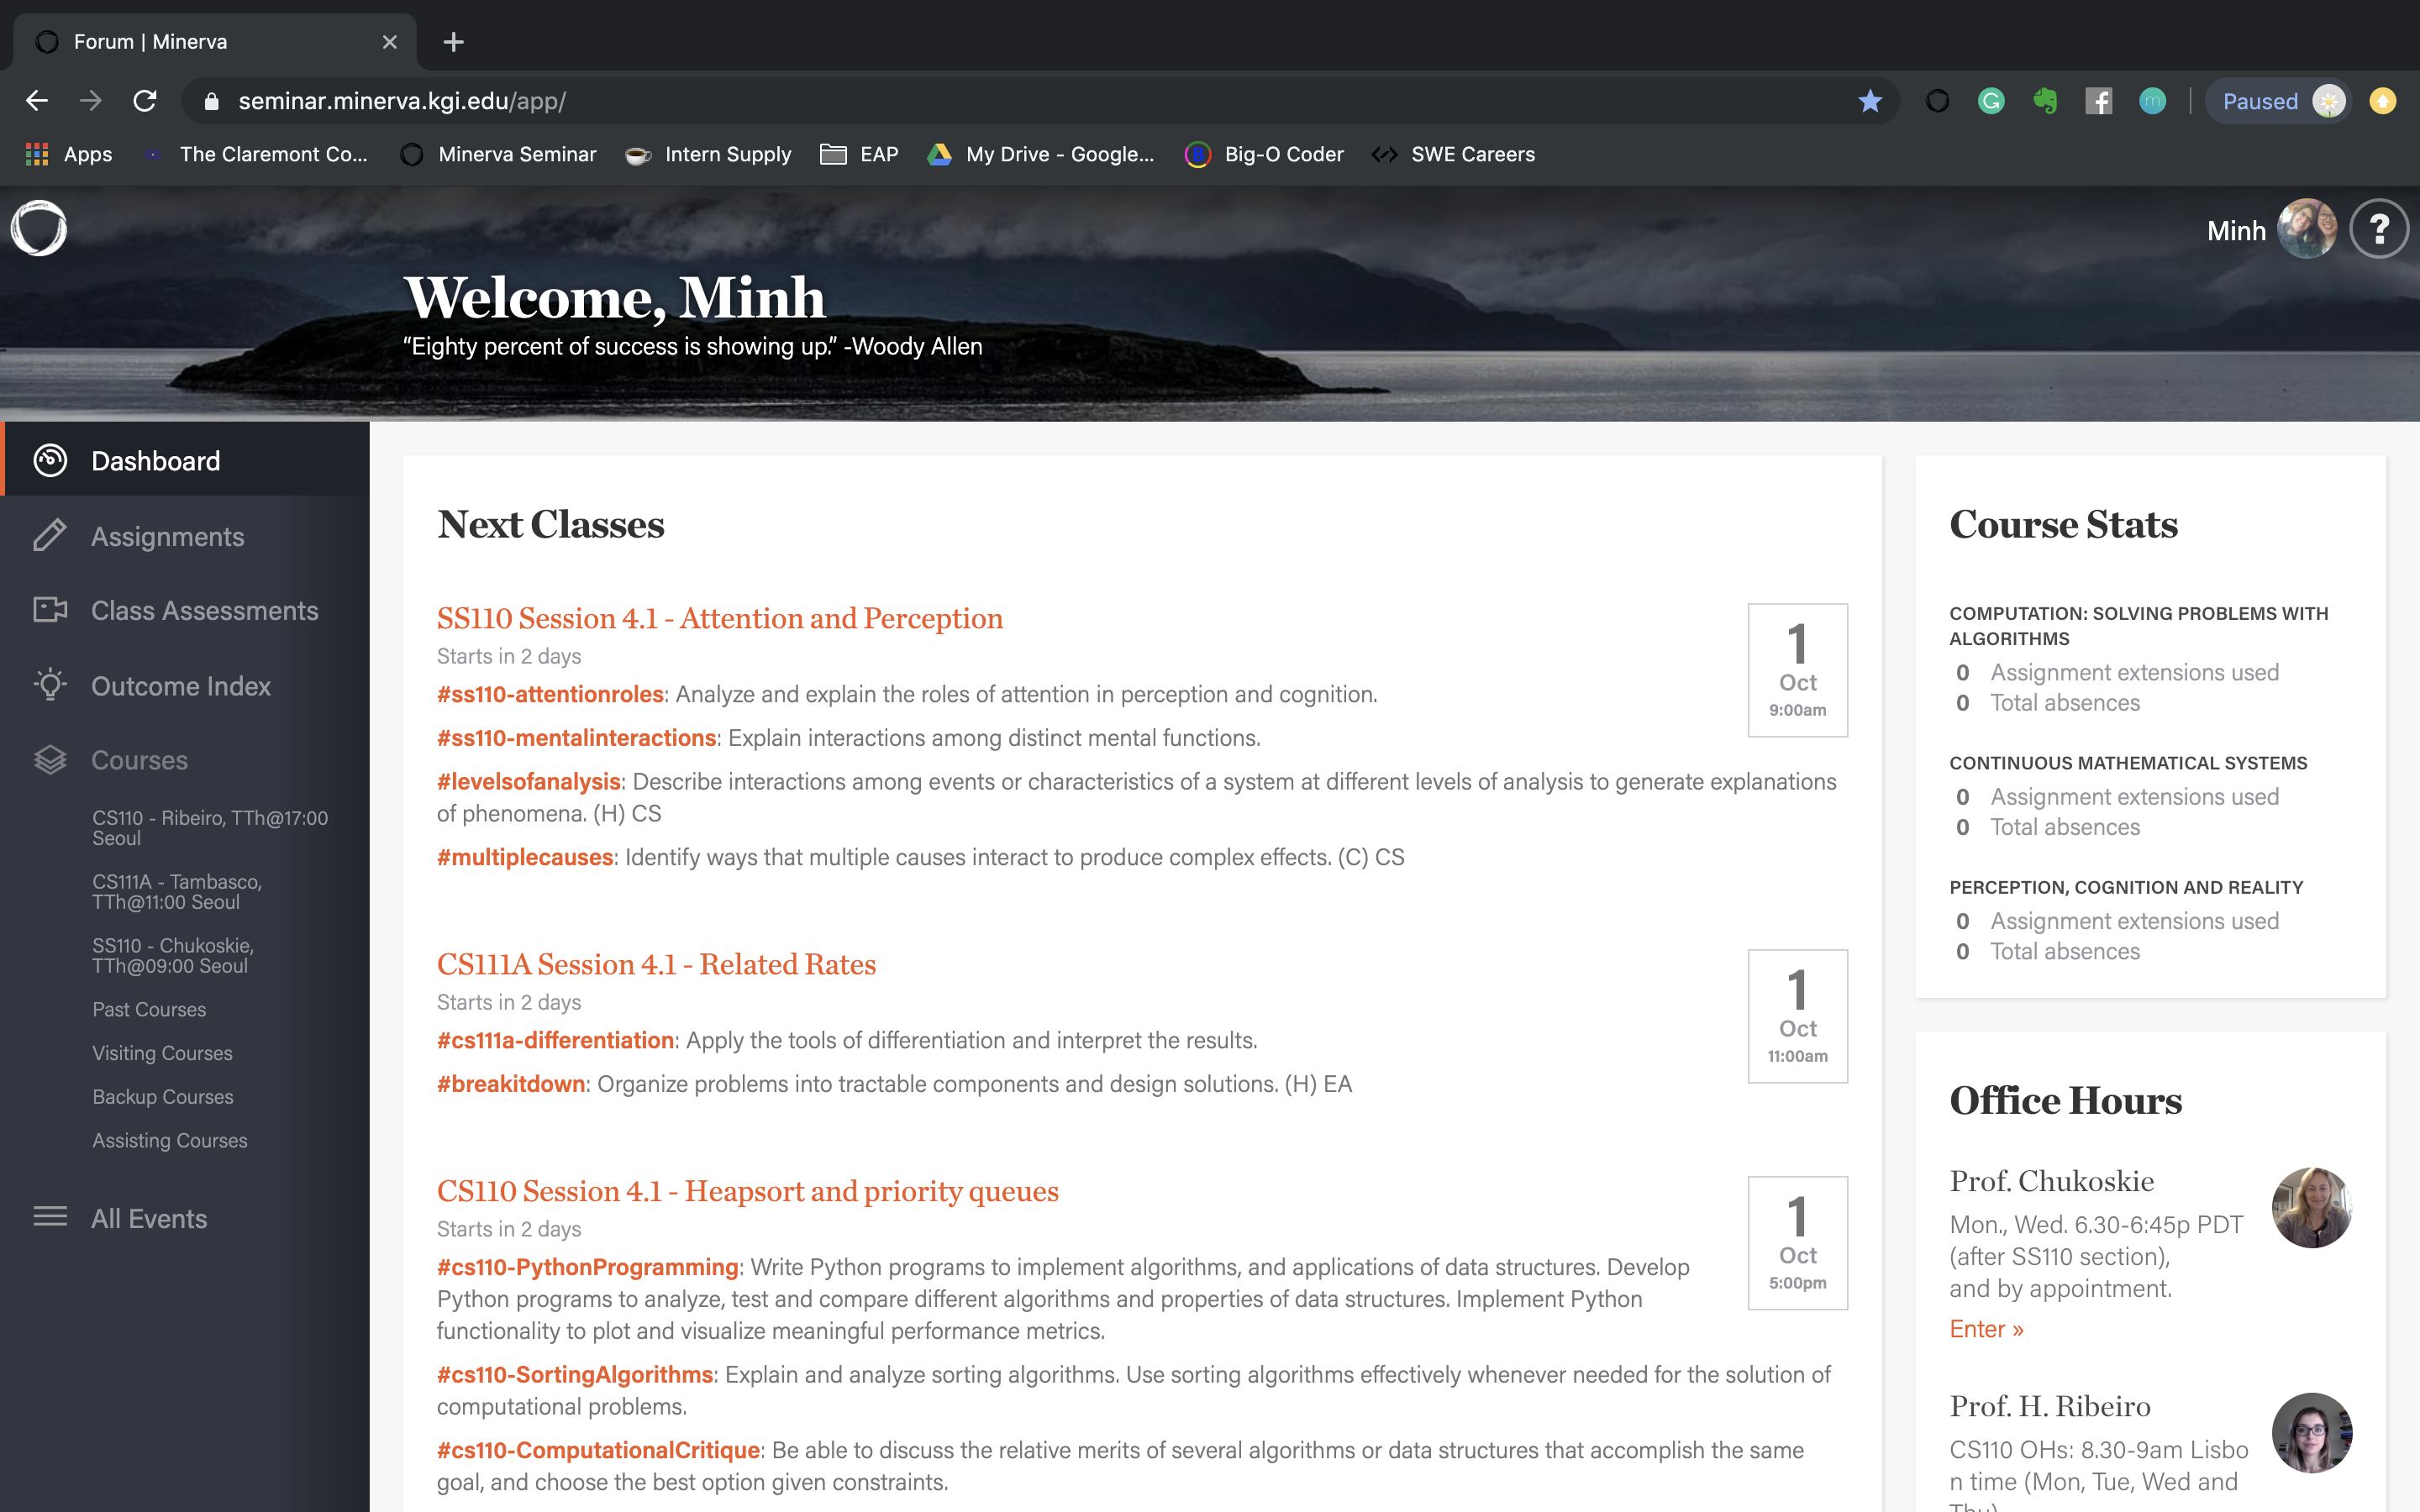

In [2]:
from IPython.display import Image
Image("1.png")

In [3]:
import math
import time
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import random

## Question 2. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list**.

In [4]:
def threeWayMerge(lst, L,M,R):
    
    #set up the variable - infinity
    INF = float("inf")
    
    #append infinity to the end of each list L,M, R
    L.append(INF)
    M.append(INF)
    R.append(INF)
    
    #set up the pointer for each list, start from 0
    i,j,k,h = 0,0,0,0
    
    #using while loop
    #stop when all pointers at INF position
    while L[i] != INF or M[j] != INF or R[k] != INF:
        
        #choosing the smallest value and put in the main list
        lst[h] = min(L[i], M[j], R[k])
        
        #if L[i] is the smallest value
        if L[i] == lst[h]:
            #increase the i
            i += 1
        
        #if M[j] is the smallest value
        elif M[j] == lst[h]:
            #increase the j
            j += 1
        
        #if R[k] is the smallest value
        else:
            #increase the k
            k += 1
        
        #increase the h
        h += 1
        
def threeWayMergeSort(lst):
    
    n = len(lst)
    
    #foundation case
    if n <= 1:
        return lst
    
    #check the type of input
    if str(type(lst)) == "<class 'numpy.ndarray'>":
        lst = np.ndarray.tolist(lst)
    
    #divide the list into 3 sublists
    nL = n//3
    nM = nL + (n - nL)//2
    L = lst[:nL]
    M = lst[nL:nM]
    R = lst[nM:]
    
    #using recursion to sort the left list
    threeWayMergeSort(L)
    
    #using recursion to sort the middle list
    threeWayMergeSort(M)
    
    #using recursion to sort the right list
    threeWayMergeSort(R)
    
    #merge three sorted sublists to have sorted list
    threeWayMerge(lst,L,M,R)
    
    return lst

In [5]:
import numpy as np
assert(threeWayMergeSort([0,1]) == [0,1] )
assert(threeWayMergeSort([0,0]) == [0,0] )
assert(threeWayMergeSort([-3,-4,-5]) == [-5,-4,-3] )
assert(threeWayMergeSort([0]) == [0])
assert(threeWayMergeSort(np.array([-8,5,1,-2,3,4])) == [-8,-2,1,3,4,5])
assert(threeWayMergeSort(np.array([0])) == [0])

In [6]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3.  [(#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique] 

Implement a second version of a three-way merge sort that calls selection sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify what might be an appropriate threshold for the input array for applying selection sort.

In [7]:
def selectionSort(A):
    n = len(A) 
    
    if str(type(A)) == "<class 'numpy.ndarray'>":
        A = np.ndarray.tolist(A)
        
    #we want to check the value from 0 to n-1, not n
    #we have i+1 to check the final element
    for i in range (n-1): 
    
        #the index of the smallest value in the range
        minidx = i 
        
        #we only check the value AFTER the i 
        #since we always place the smallest number of the range before
        for j in range (i+1, n): 
            
            #finding the smallest number in the range               
            if A[j] < A[minidx]: 
                
                #change the index of the smallest number
                minidx = j 
                
        #swap the value of the first element of the range with the smallest
        #so the smallest value's index = i
        # we continue to do the function from index i+1 to n-1
        A[i], A[minidx] = A[minidx], A[i] 
    
    #return the sorted list
    return A
    raise NotImplementedError()

In [8]:
def extendedThreeWayMerge(lst):
    n = len(lst)
    
    #check the type of input
    if str(type(lst)) == "<class 'numpy.ndarray'>":
        lst = np.ndarray.tolist(lst)
        
    #when we stop dividing
    if n <= 6:
        
        #using selection sort to sort the sublists
        selectionSort(lst)
        return lst
    
    #divide the list into 3 sublists
    nL = n//3
    nM = nL + (n - nL)//2
    L = lst[:nL]
    M = lst[nL:nM]
    R = lst[nM:]
    
    #using recursion to sort the left list
    threeWayMergeSort(L)
    
    #using recursion to sort the middle list
    threeWayMergeSort(M)
    
    #using recursion to sort the right list
    threeWayMergeSort(R)
    
    #merge three sorted sublists to have sorted list
    threeWayMerge(lst,L,M,R)
    
    return lst

In [9]:
import numpy as np
assert(extendedThreeWayMerge([0,1]) == [0,1] )
assert(extendedThreeWayMerge([-3,-4,-5]) == [-5,-4,-3] )
assert(extendedThreeWayMerge([0]) == [0])
assert(extendedThreeWayMerge(np.array([-8,5,1,-2,3,4])) == [-8, -2, 1, 3, 4, 5])
assert(extendedThreeWayMerge(np.array([0])) == [0])


In [10]:
assert(extendedThreeWayMerge(np.array([i for i in range (30,0,-1)])) == [i for i in range (1, 31)])

-------

## Computing the threshold.  

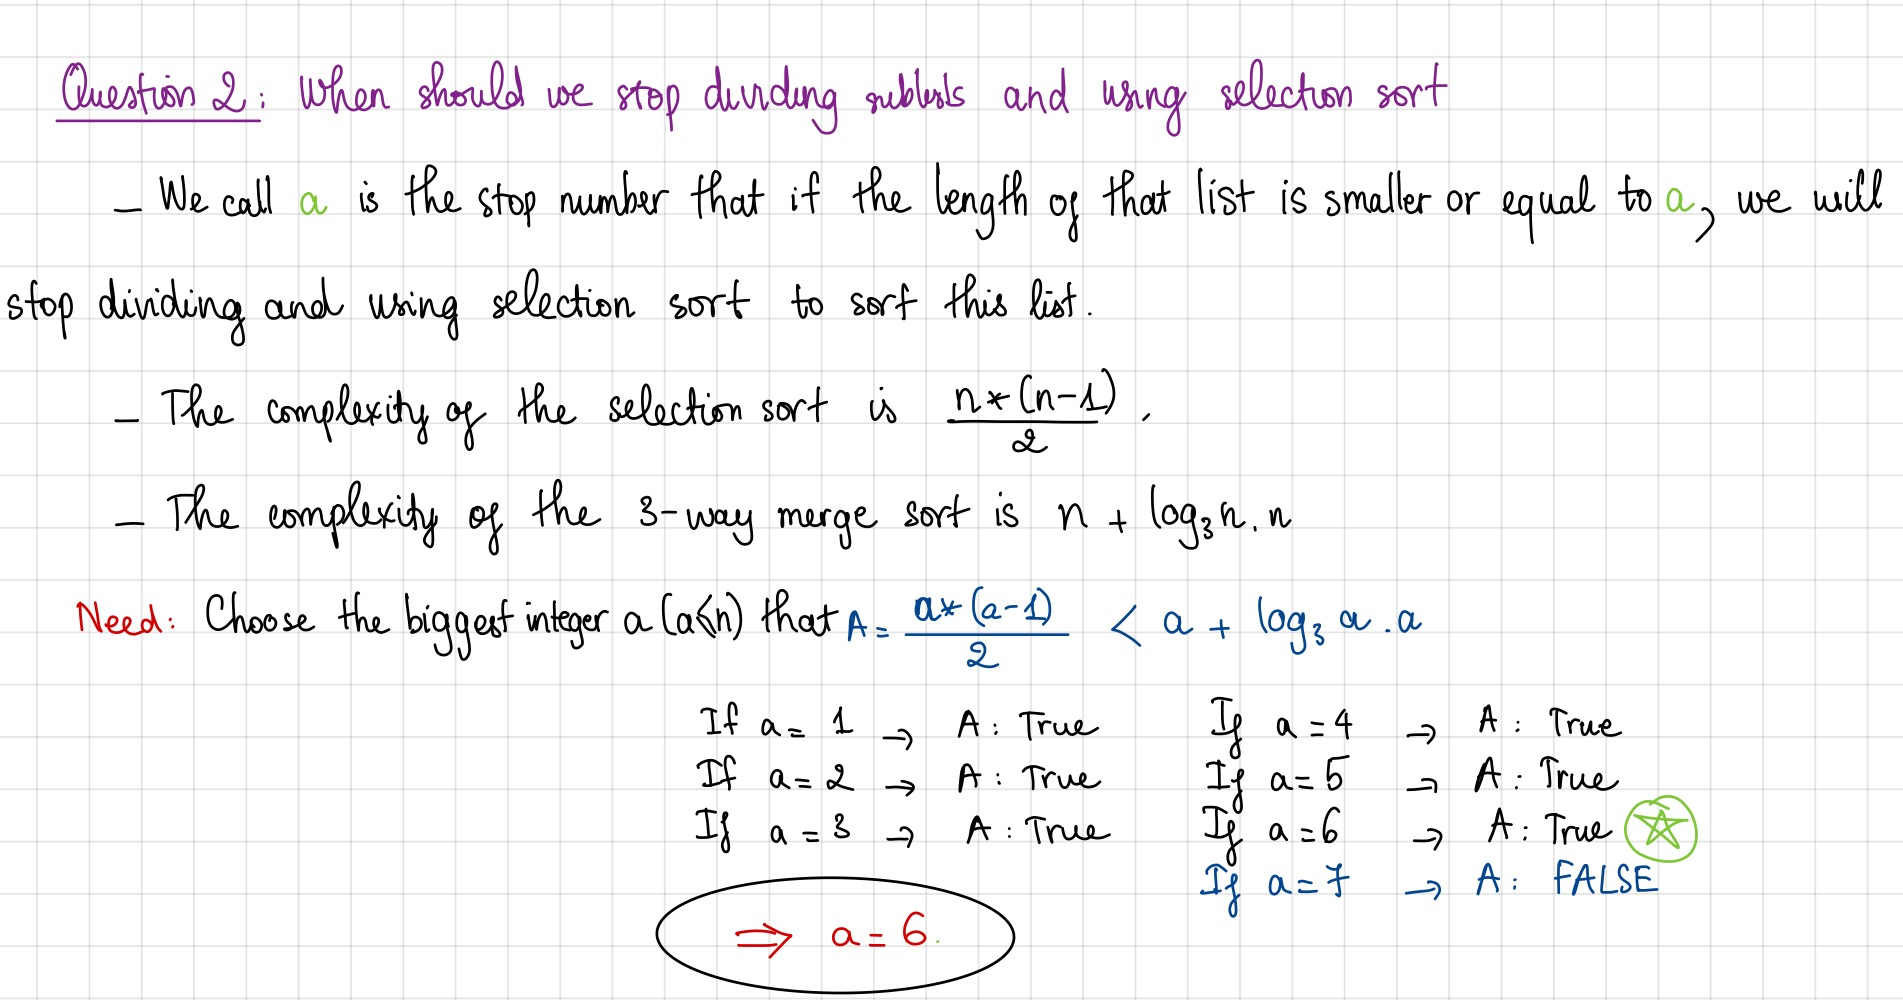

In [11]:
Image("IMG_0453.JPG")

**Note:** $a \leq 6$ is the answer of A (blue)

In [12]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an n-element array and the number of buckets, k, to be used during sorting.  Then, the algorithm distributes the elements of the input array into k-different buckets and proceeds to sort the individual buckets.  Here is pseudocode for the BucketSort algorithm:
<img src="images/bucket.png" width="800" height="200">

Write a Python 3 implementation of BucketSort that uses the selection sort algorithm for sorting the individual buckets in line 8 of the algorithm.

In [13]:
def bucketSort(lst, k):
    """Implements BucketSort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    #create k buckets
    Buckets = [[] for i in range (k)]
    
    #check the type of input
    if str(type(lst)) == "<class 'numpy.ndarray'>":
        lst = np.ndarray.tolist(lst)
    
    #finding the max value and min value
    M = max(lst)
    N = min(lst)
    
    #if the max value == min value, all elements are equal
    if M == N:
        return lst
    
    #calculate the size of the bucket
    #or the range of the number
    size = (M-N)/k
    
    #consider the whole list
    for i in range (len(lst)):
        
        #choosing the bucket for one element
        # position = floor((lst[i] - N)/size)
        b = math.floor((lst[i]-N)/size)
        
        #append element to the bucket
        if b != k:
            #append to that b-th bucket
            Buckets[b].append(lst[i])
        else:
            #if b == k, we put it in the final bucket, b-1
            Buckets[b-1].append(lst[i])
    
    #sort each bucket by selection sort
    for i in range (k):
        selectionSort(Buckets[i])
    
    #clean the old list
    lst.clear()
    
    #combine all the sorted buckets to have the result
    for i in range (k):
        lst += Buckets[i]
    return lst

In [14]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Implement a second version of the BucketSort algorithm. This time in line 8, call Bucket sort recursively until the bucket either has exactly 1 or zero elements. 


In [15]:
def extendedBucketSort(lst, k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    #create k buckets
    Buckets = [[] for i in range (k)]
    
    #check the type of input
    if str(type(lst)) == "<class 'numpy.ndarray'>":
        lst = np.ndarray.tolist(lst)
    
    #finding the max value and min value
    M = max(lst)
    N = min(lst)
    
    #if the max value == min value, all elements are equal
    if M == N:
        return lst
    
    #calculate the size of the bucket
    #or the range of the number
    size = (M-N)/k
    
    #consider the whole list
    for i in range (len(lst)):
        
        #choosing the bucket for one element
        # position = floor((lst[i] - N)/size)
        b = math.floor((lst[i]-N)/size)
        
        #append element to the bucket
        if b != k:
            #append to that b-th bucket
            Buckets[b].append(lst[i])
        else:
            #if b == k, we put it in the final bucket, b-1
            Buckets[b-1].append(lst[i])
    
    #sort each bucket by recursion
    for i in range (k):
        
        #if there is more than 1 element in that list
        if len(Buckets[i]) > 1:
            
            #continue to divide and sort
            extendedBucketSort(Buckets[i], k)
    
    #clean the old list
    lst.clear()
    
    #combine all the sorted buckets to have the result
    for i in range (k):
        lst += Buckets[i]
    return lst
    raise NotImplementedError()

In [16]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

------

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the augmented merge sort from (1) by producing a plot that illustrates how every running time and number of steps grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


## Definition


**Define step counter** A problem needs a lot of command or condition to convert the input to the output. Steps in my assignment are the total number of steps that need to run to deal with problem.

For example:
- We need $1$ step to find the $len(list)$ but we will need $n$ steps to find the maximum of that list

**Define the complexity**
- For an algorithm, there are two important complexities: time complexity and space complexity

- Time complexity is a definition that relating to the speed of an algorithm when it runs.

- There are three properties that we normally use to calculate the time complexity:
    - Upper bound: $O$
    - Lower bound: $\Omega$
    - Tight bound: $\Theta$
- We have three different cases to consider:
    - **Worst-case performance**
    - Best-case performance
    - Average performance
- In this assignment, I focus on time complexity by providing the worst-case performance and best-case performance of time complexity with the input size n.

**Define the simulation**
- Time estimation is a crucial tool to compare the efficiency of many algorithms 

- However, the running time is not stable, depending on the hardware of the laptop. 

- To minimize the bias, I choose to run the algorithm many times for the **same** input and calculate the average.

**Define the cases**
- In this assignment, I choose the worst-case input to run the algorithm. 

- Using the random may be a good choice when you want to test your algorithm. However, it will not be appropriate to run simulation.

- Since all sort algorithms in this assignment are ascending sort ( from smallest to biggest value), I choose an descending order list for the input. 

- Why is this a worst case?
    - Because they need to run through every step to have the accurate output. Without it, they may skip some swaps or comparison.
    


-----

## The complexity of each function

**The complexity of merge sort**

- Worst-case: $O(\log_{2}{n}* n) $ when the input is descending order
- Best case:  $\Omega(\log_{2}{n}* n)$ when the input is an sorted list

$\rightarrow$ The complexity of merge sort: $\Theta(\log_{2}{n}* n)$

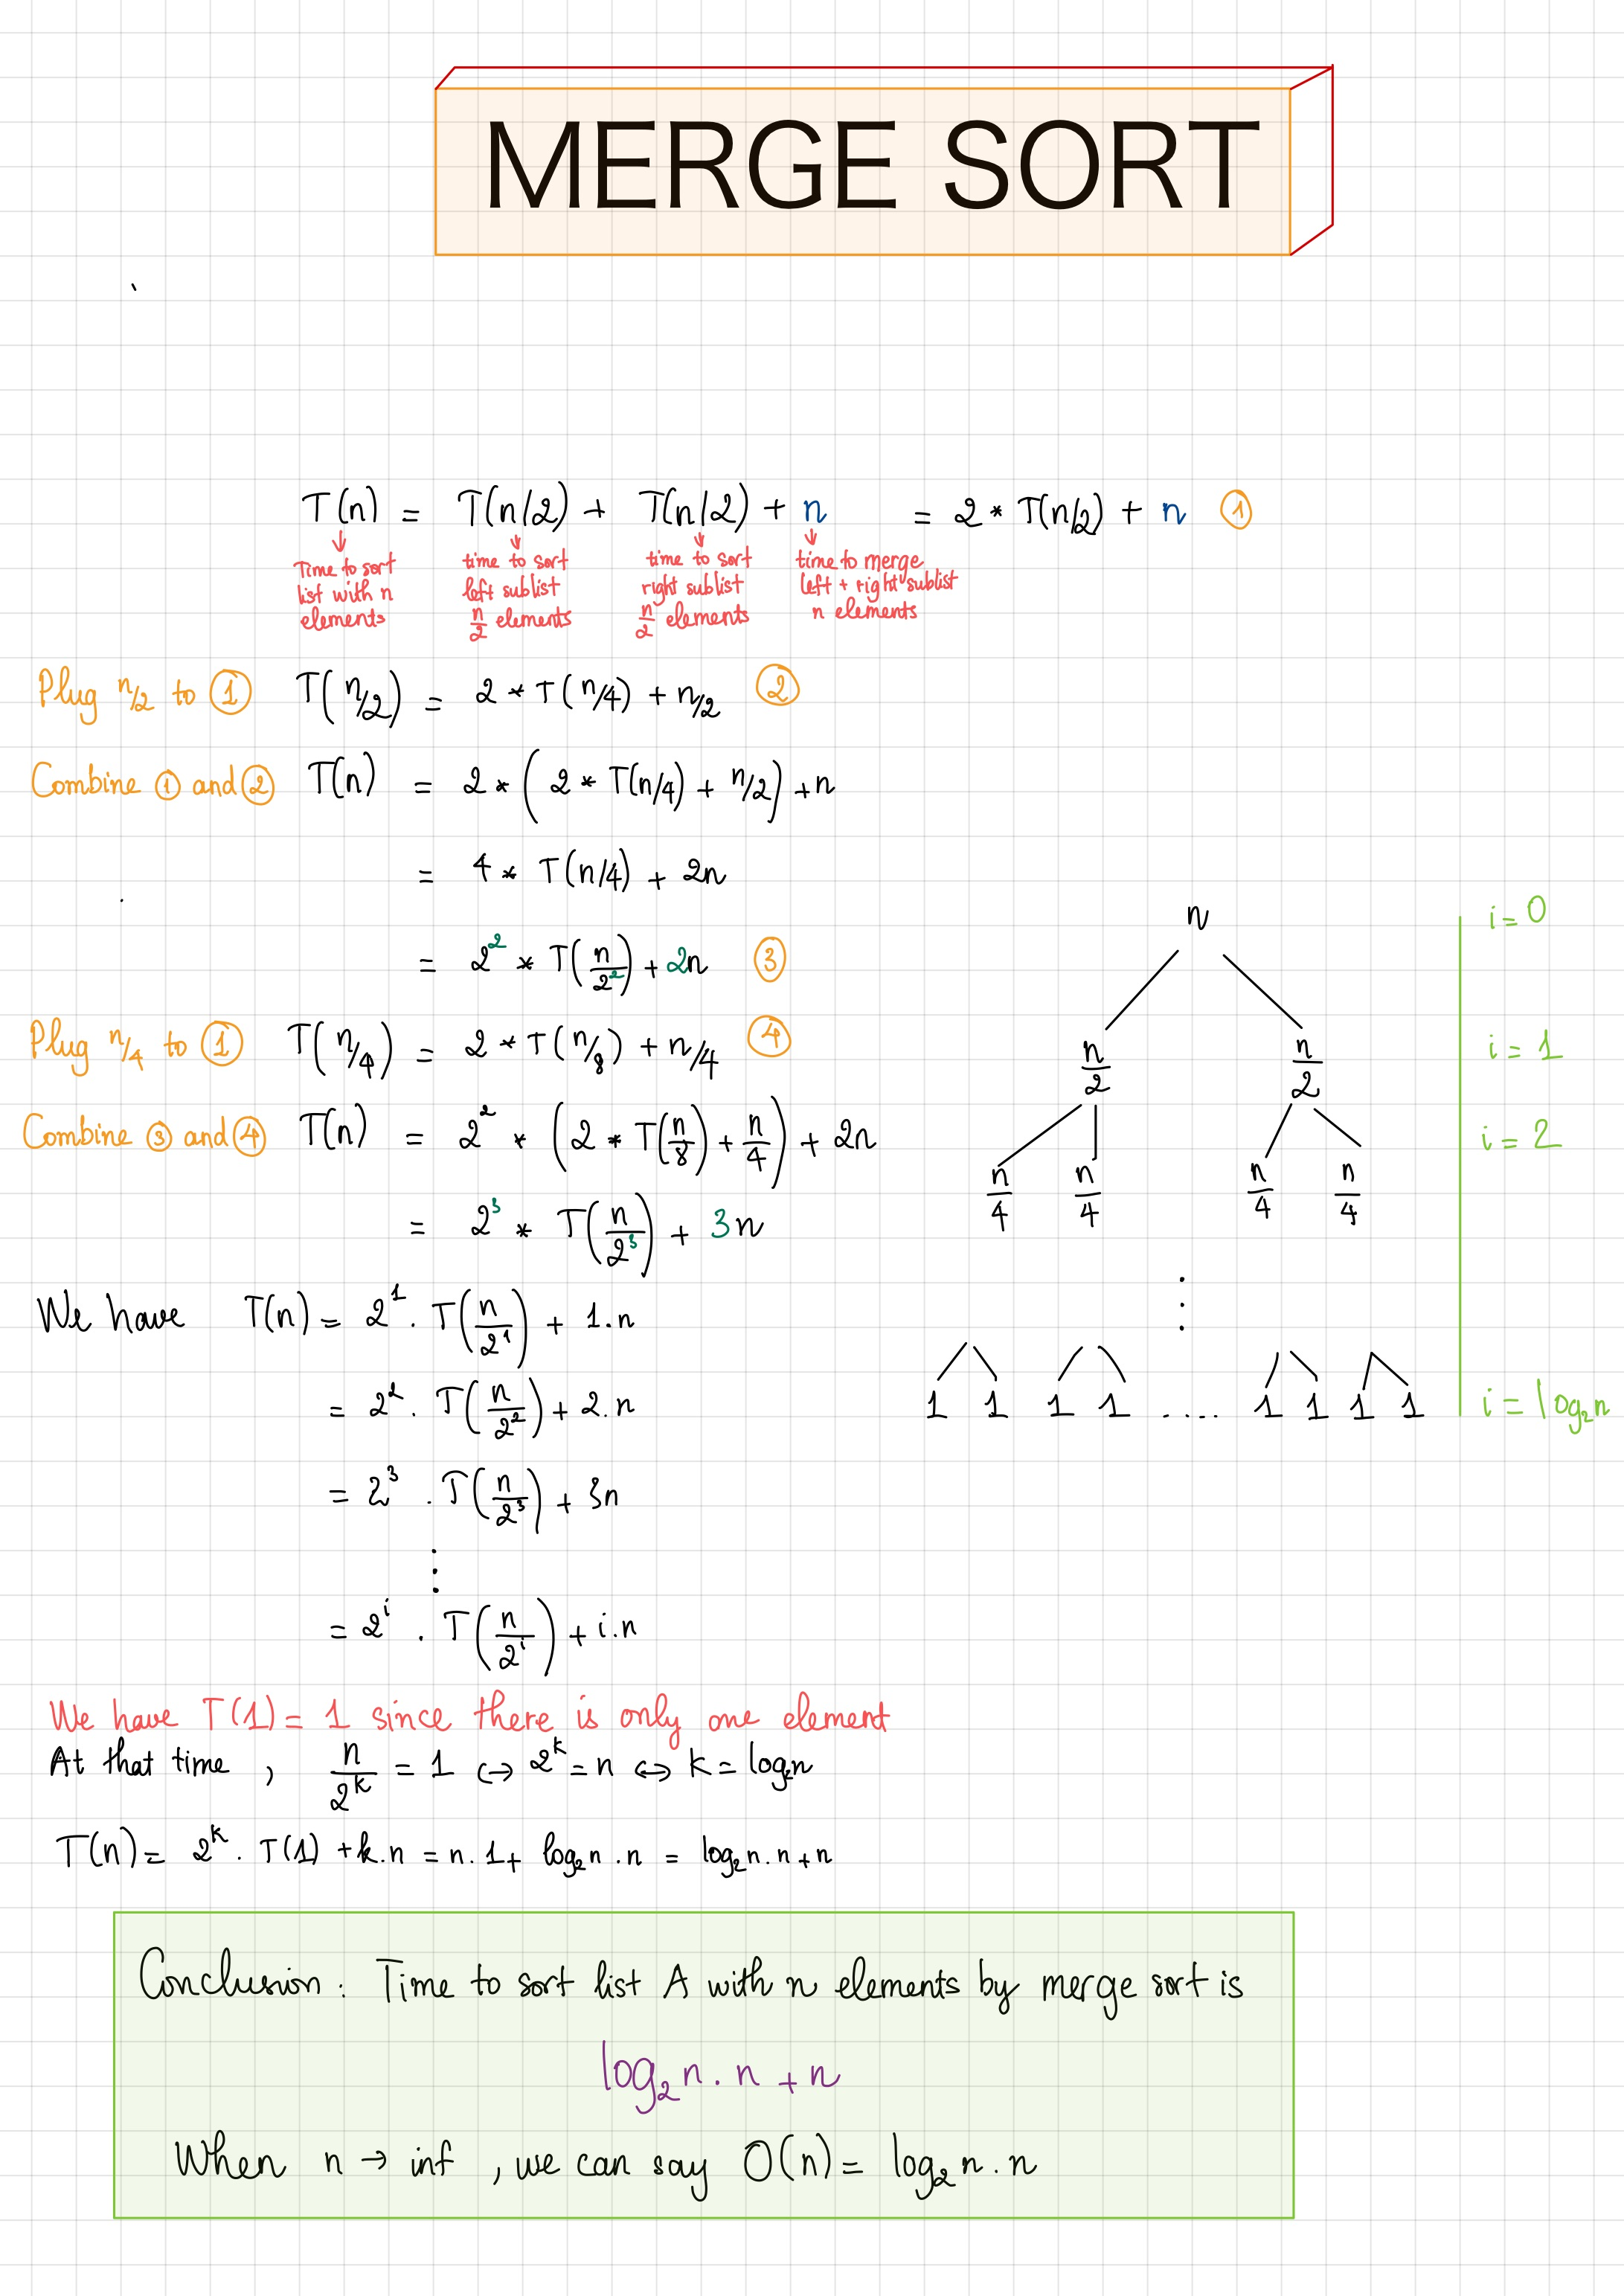

In [17]:
Image("IMG_0447.JPG")

**The complexity of three ways merge sort**

- Worst-case: $O(\log_{3}{n}* n) $ when the input is descending order
- Best case:  $\Omega(\log_{3}{n}* n)$ when the input is an sorted list

$\rightarrow$ The complexity of merge sort: $\Theta(\log_{3}{n}* n)$

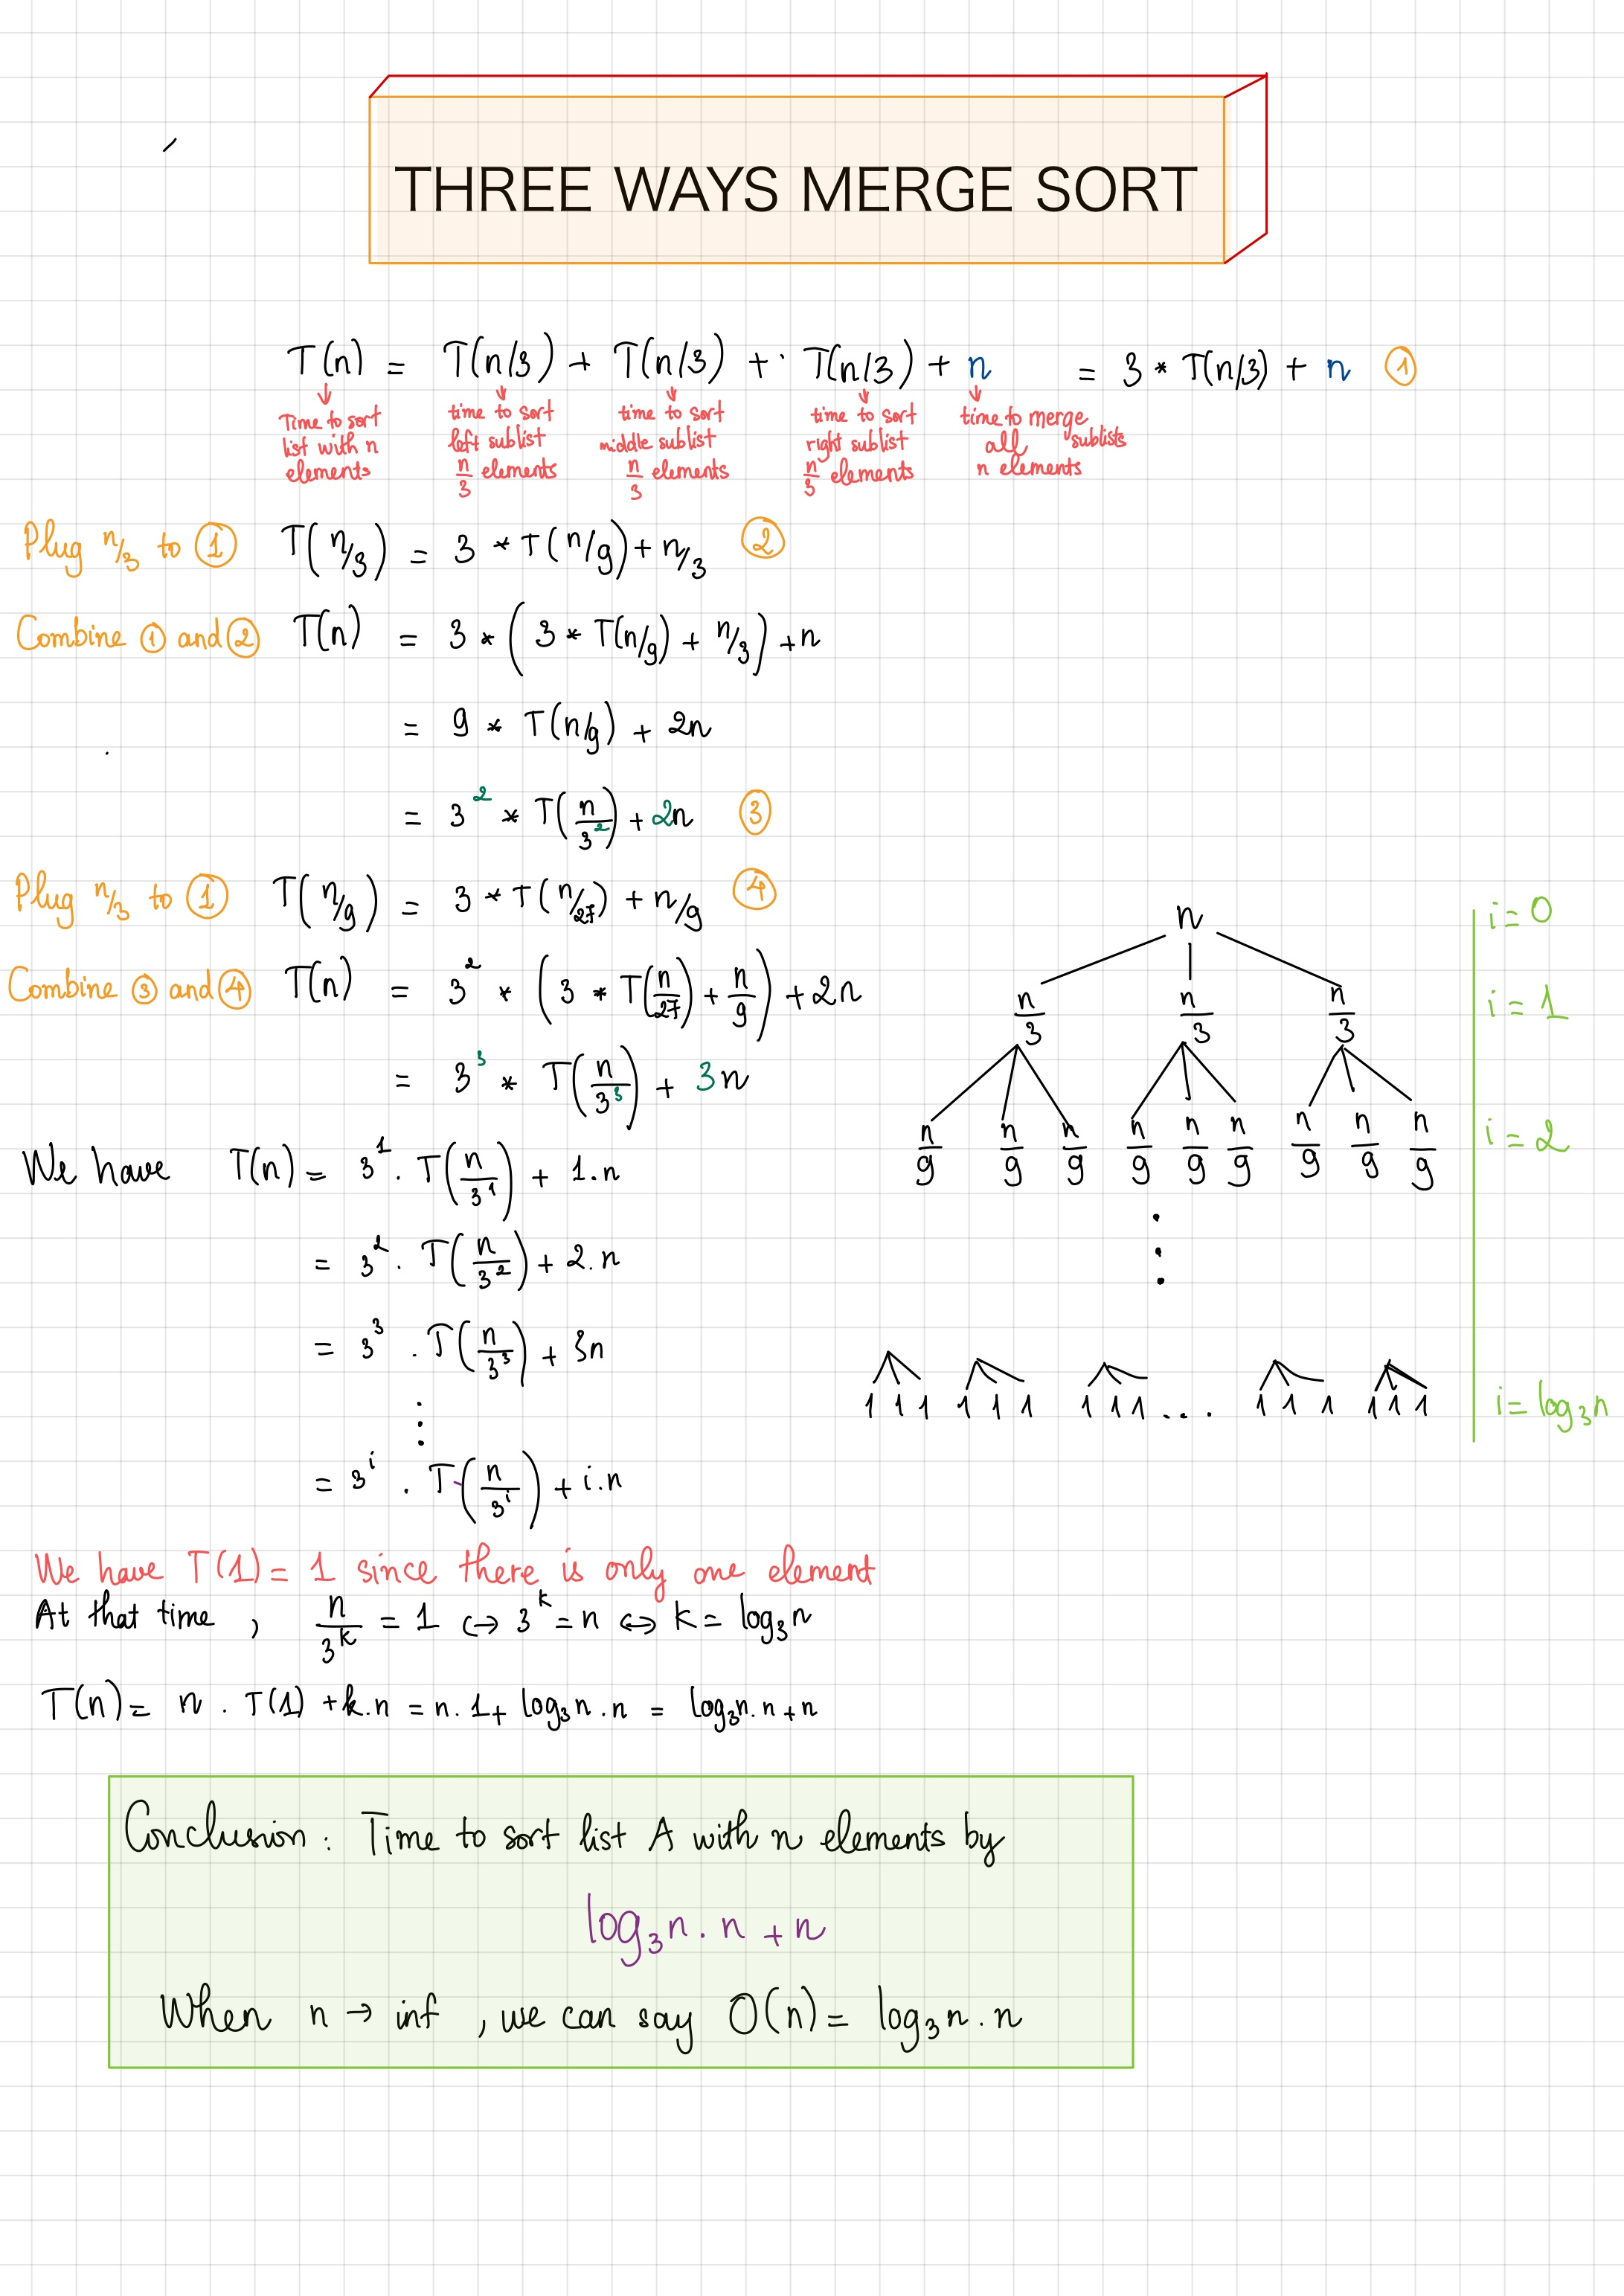

In [18]:
Image("IMG_0449.JPG")

**The complexity of extended three ways merge sort**

- Worst-case: $O(n^2) $ when a == n, the same as selection sort
- Best case:  $\Omega(\log_{3}{n}* n)$ when a $\leq$ 6


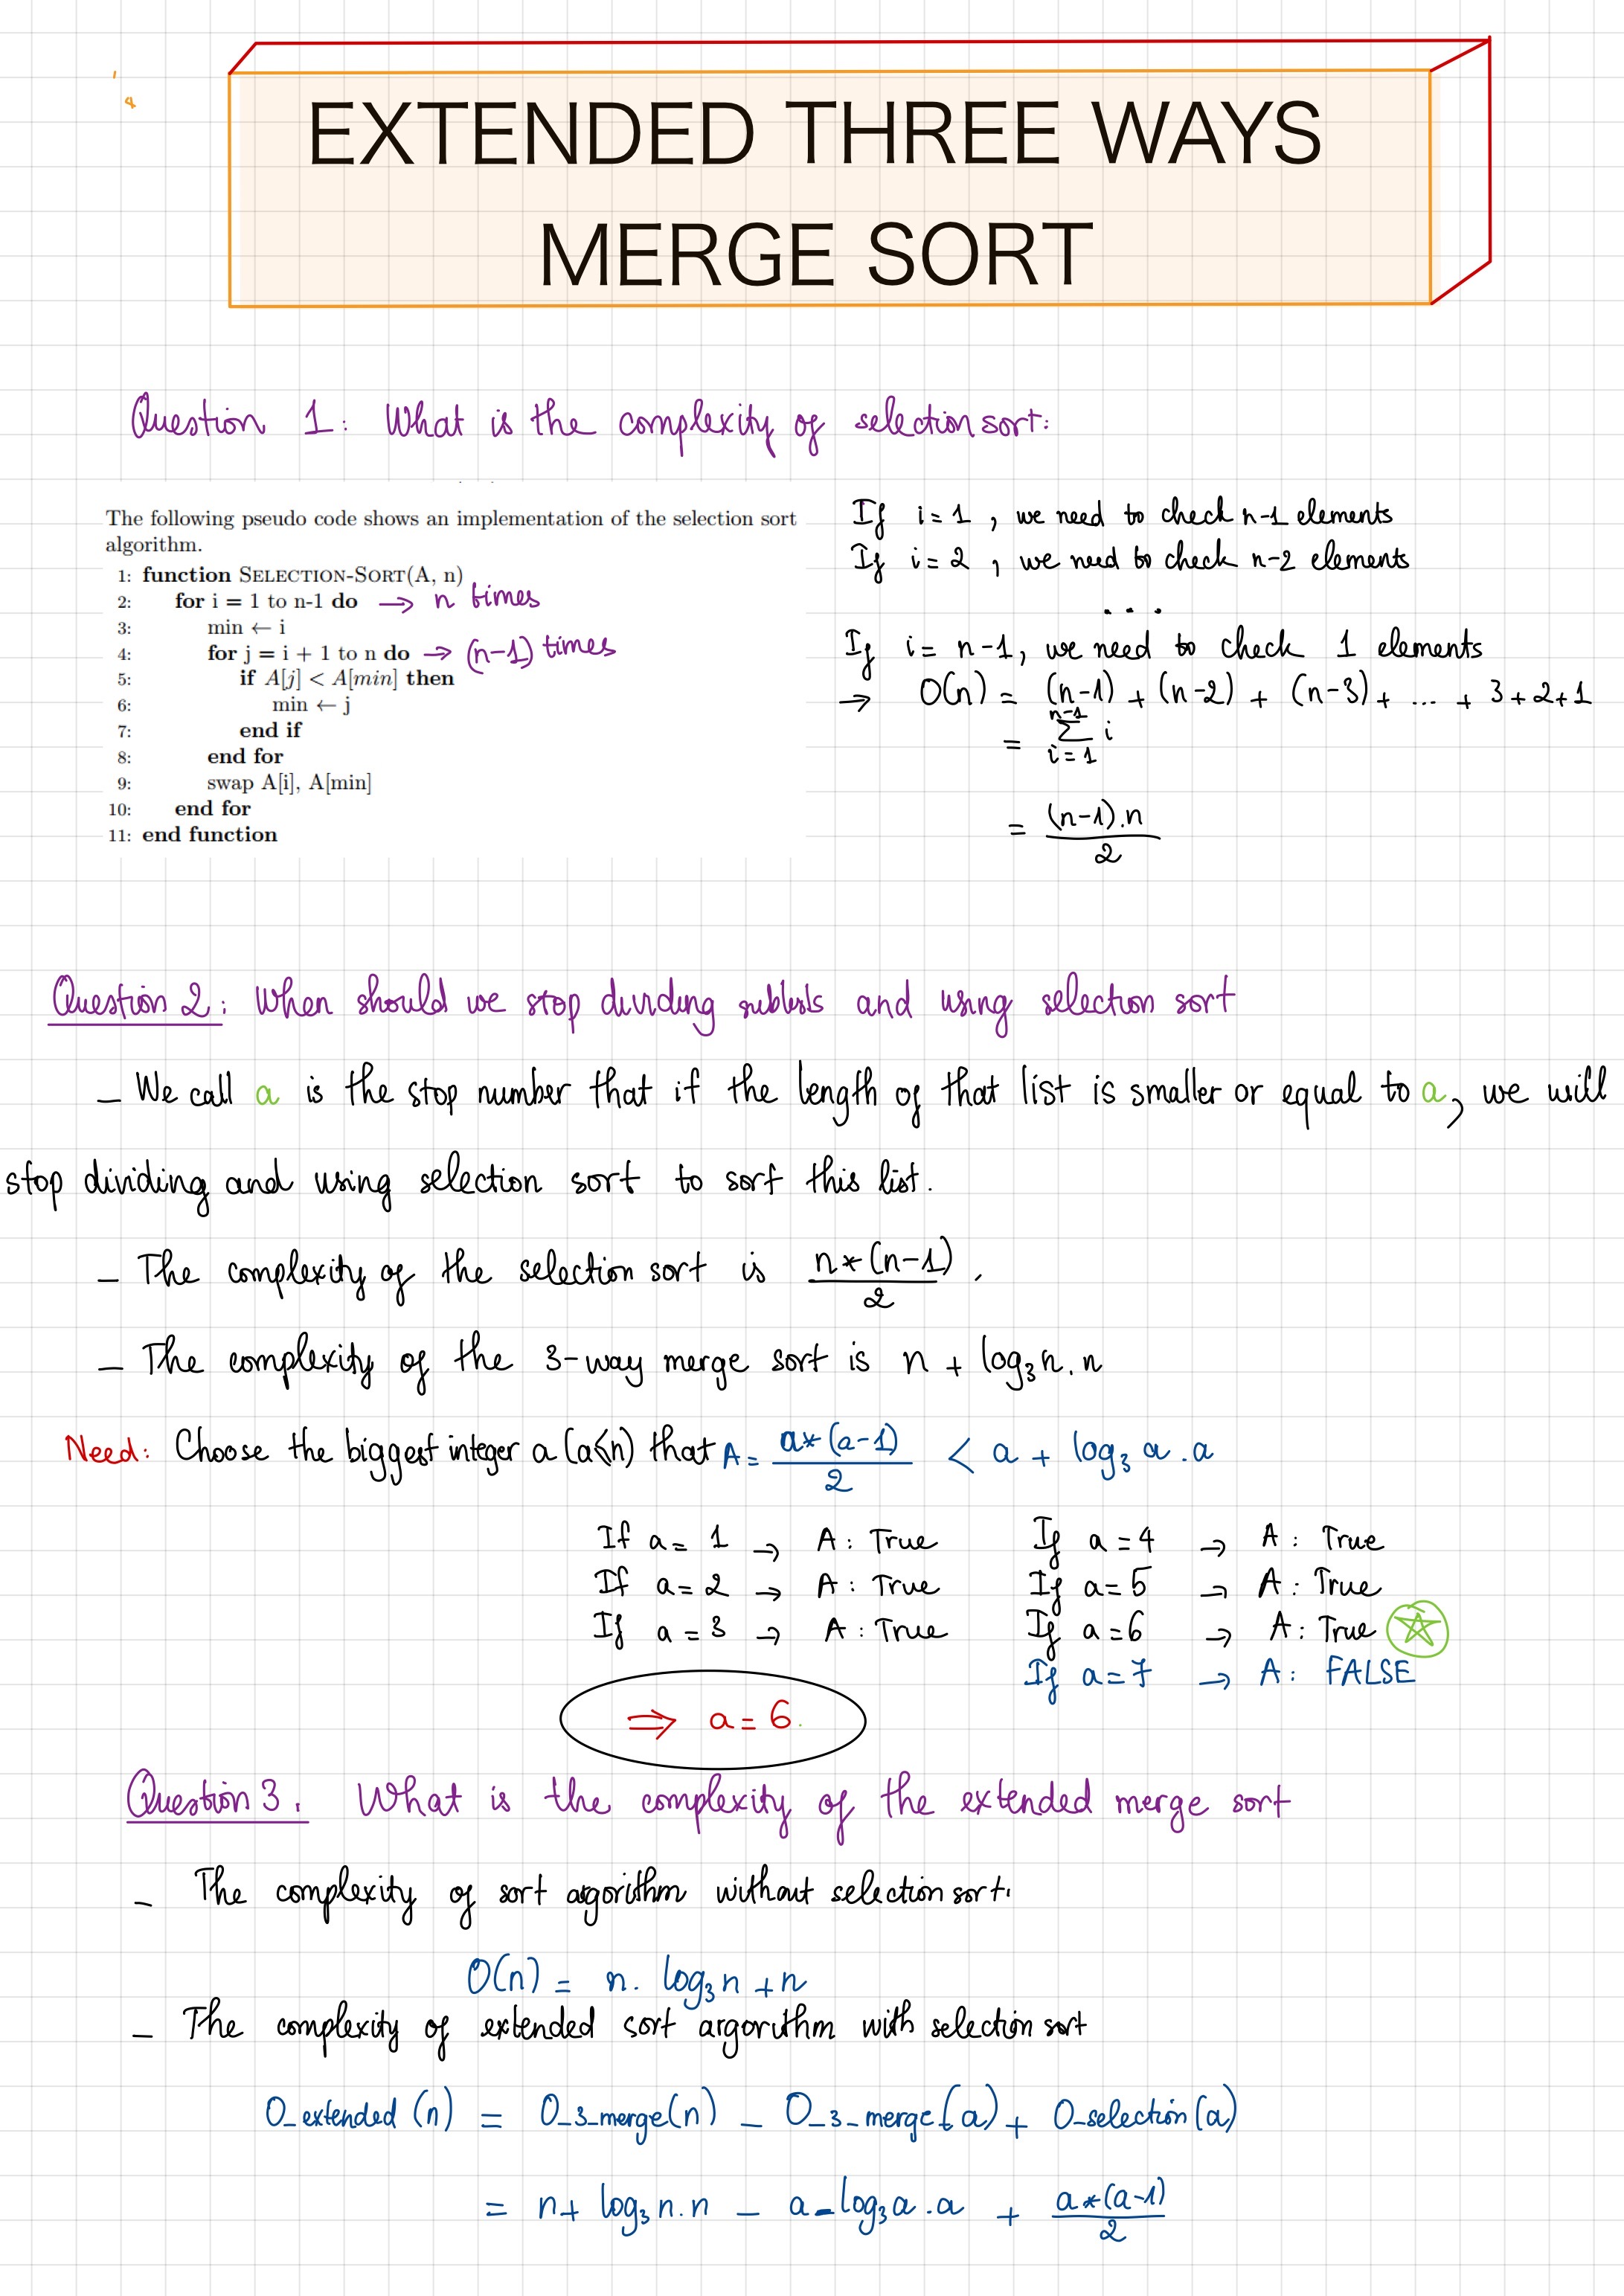

In [19]:
Image("IMG_0456.JPG")

-------

## The algorithm with step counter

In [20]:
#regular merge sort
def merge(A,p,q,r):
    
    #global step
    global step
    INF = 10 ** 9

    #increase step 
    step += (r-p)
    L = A[(p-1):q]
    R = A[q:r]
    
    #increase step
    step += 2
    L.append(INF)
    R.append(INF)
    
    i,j = 0,0
    for k in range (p-1, r):
        #calculate the k
        step += 1
        
        #step to find min
        step += 1
        A[k] = min(L[i], R[j])
        
        #increase step
        step += 1
        if L[i] < R[j]:
            i += 1
        else:
            j += 1
    return A

def merge_sort(A,p,r):
    global step
    if p < r:
        step += 1
        q = (p+r) // 2
        merge_sort(A,p,q)
        merge_sort(A,q+1, r)
        merge(A,p,q,r)
    return A

In [21]:
#three ways merge 
def threeWayMerge(lst, L,M,R):
    global step
    INF = float("inf")
    
    #increase step
    step += 3
    L.append(INF)
    M.append(INF)
    R.append(INF)
    
    i,j,k,h = 0,0,0,0
    
    while L[i] != INF or M[j] != INF or R[k] != INF:
        #check the conditions
        step += 1
        
        #find the min
        lst[h] = min(L[i], M[j], R[k])
        step += 2
        
        #increase the pointer
        step += 1
        if L[i] == lst[h]:
            i += 1
        elif M[j] == lst[h]:
            j += 1
        else:  
            k += 1
            
        #increase the pointer of the main lst
        step += 1
        h += 1

In [22]:
# three ways merge sort
def threeWayMergeSort(lst):
    """Implements three-way marge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    global step
    
    #calculate length
    step += 1
    n = len(lst)
    
    if n <= 1:
        step += 1
        return lst
    #calculate nL, nM
    step += 2
    nL = n//3
    nM = nL + (n - nL)//2
    
    #cut the list
    step += n
    L = lst[:nL]
    M = lst[nL:nM]
    R = lst[nM:]
    
    threeWayMergeSort(L)
    threeWayMergeSort(M)
    threeWayMergeSort(R)
    threeWayMerge(lst,L,M,R)
    return lst

In [23]:
#selection sort
def selectionSort(A):
    global step
    
    step += 1
    n = len(A) 
    
    for i in range (n):
        
        #assign value to min idx
        minidx = i 
        step += 1
        
        for j in range (i+1, n):
            
            #run to for j
            step += 1
            
            if A[j] < A[minidx]:
                minidx = j
                step += 1
    
        #swap elements
        A[i], A[minidx] = A[minidx], A[i]
        step += 2

    return A

In [24]:
#merge + selection
def extendedThreeWayMerge(lst):
    global step
    
    #calculate length
    step += 1
    n = len(lst)
    
    if n <= 6:
        selectionSort(lst)
        return lst
    
    #calculate nM, nL
    step += 2
    nL = n//3
    nM = nL + (n - nL)//2
    
    #divide list
    step += n
    L = lst[:nL]
    M = lst[nL:nM]
    R = lst[nM:]
    
    extendedThreeWayMerge(L)
    extendedThreeWayMerge(M)
    extendedThreeWayMerge(R)
    threeWayMerge(lst,L,M,R)
    
    return lst

--------

## Calculate the step and plot the graph

In [25]:
#step of merge sort
step_merge = []
for k in range (1, 16):
    step = 0
    list_k = [i for i in range (100*k, 0, -1)]
    merge_sort(list_k, 1, len(list_k))
    step_merge.append(step)
# print(step_merge)

In [26]:
#steps of 3 way merge sort
step_merge_3 = []
for k in range (1, 16):
    step = 0
    list_k = [i for i in range (100*k, 0, -1)]
    threeWayMergeSort(list_k)
    step_merge_3.append(step)
# print(step_merge_3)

In [27]:
#steps of extended merge sort
step_extended_merge = []
for k in range (1, 16):
    step = 0
    list_k = [i for i in range (100*k, 0, -1)]
    extendedThreeWayMerge(list_k)
    step_extended_merge.append(step)
# print(step_extended_merge)

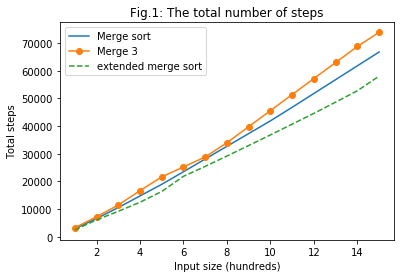

In [28]:
size = [i for i in range (1,16)]
plt.plot(size, step_merge, label = "Merge sort")
plt.plot(size, step_merge_3, label = "Merge 3 ", marker='o')
plt.plot(size, step_extended_merge, label = "extended merge sort", linestyle = 'dashed')
plt.xlabel('Input size (hundreds)')
plt.ylabel('Total steps')
plt.title('Fig.1: The total number of steps')
plt.legend()
plt.show()

-----

## Calculate the time for each function and plot in graph

Structure of simulation

- Step 0: Import time 
- Step 1: Run the function 100 times to get 100 time counters of the same input, put them to a list
- Step 2: Calculate the average of 100 times 
- Step 3: Increase the input size and comback to step 1

In [29]:
#time for merge sort with simulation
regular_merge = []

for k in range (1,21):
    t_merge = 0
    for j in range (100):
        list_k = [i for i in range (100*k, 0, -1)]
        start = time.time()
        merge_sort(list_k, 1, len(list_k))
        end = time.time()
        t_merge += (end-start)
    regular_merge.append(t_merge/100)
# print(regular_merge)

In [30]:
#time for 3 way merge sort with simulation
merge_3 = []

for k in range (1, 21):
    t_merge_3 = 0
    for i in range (100):
        list_k = [i for i in range (100*k, 0, -1)]
        start = time.time()
        threeWayMergeSort(list_k)
        end = time.time()
        t_merge_3 += end- start
    merge_3.append(t_merge_3/100)
# print(merge_3)

In [31]:
extended_merge_3 = []

for k in range (1, 21):
    extend_merge = 0
    for i in range (100):
        list_k = [i for i in range (100*k, 0, -1)]
        start = time.time()
        extendedThreeWayMerge(list_k)
        end = time.time()
        extend_merge += end- start
    extended_merge_3.append(extend_merge/100)
# print(extended_merge_3)

## Graph for regular merge sort, three ways merge sort and extended merge sort

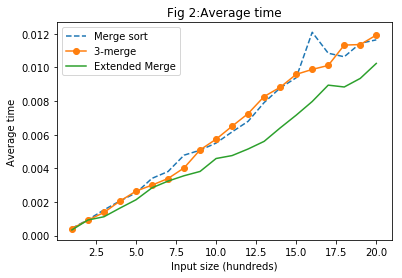

In [32]:
size = [i for i in range (1,21)]
plt.plot(size, regular_merge, label = "Merge sort", linestyle = "dashed")
plt.plot(size, merge_3, label = "3-merge ", marker='o')
plt.plot(size, extended_merge_3, label = "Extended Merge")
plt.xlabel('Input size (hundreds)')
plt.ylabel('Average time')
plt.title('Fig 2:Average time')
plt.legend()
plt.show()

------

## Compare benchmarks with the theoretical result



Time complexity based on theoretical result

| Algorithms            | Worst-case             | Best-case              | Time Complexity         |
|-----------------------|-----------------------|-------------------------|-------------------------|
| Merge sort            | $O(n *log(n))$        | $\Omega(n *log(n))$     | $\Theta(n *log(n))$     |
| Three Ways Merge Sort | $O(n *log_{3}(n))$    | $\Omega(n *log_{3}(n))$ | $\Theta(n *log_{3}(n))$ |
| Extended Merge Sort   | $O(n *log_{3}(n))$    | $\Omega(n *log_{3}(n))$ | $\Theta(n *log_{3}(n))$ |

- Based on the table and explanation above, we can conclude that time complexity of the three algorithm:

                Megre sort > Three Ways Merge Sort > Extended Merge Sort


- Based on Figure 1 and Figure 2, we see the same order in both number of steps and average time


- However, we need to see the differences between **three ways merge sort** and **extended merge sort**. The extended merge sort complexity depends on how we choose the value of $a$. In this assignment, I choose $a = 6$, which is the worst of best-cases for this simulation. As a result, we still have really good time average. On the other hand, if we change the value of $a$, the larger a is, the slower the function has.


- Moreover, the gap between **regular merge sort** and **three ways merge sort** is worth considering because this is the foundation for k ways merge sort we have below. As we can see when the input size is small, the differences between them is tiny. However, as N increases, the gap becomes larger. It is **not safe** to say that we should increase the $k$ to have better time complexity even though it may be true for the case of 2 and 3

------

## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort and recursive sort from (5) by producing a plot that illustrates how each running time grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


-----

## Definition

**Define step counter** A problem needs a lot of command or condition to convert the input to the output. Steps in my assignment are the total number of steps that need to run to deal with problem.

For example:
- We need $1$ step to find the $len(list)$ but we will need $n$ steps to find the maximum of that list

**Define the complexity**
- For an algorithm, there are two important complexities: time complexity and space complexity

- Time complexity is a definition that relating to the speed of an algorithm when it runs.

- There are three properties that we normally use to calculate the time complexity:
    - Upper bound: $O$
    - Lower bound: $\Omega$
    - Tight bound: $\Theta$
- We have three different cases to consider:
    - **Worst-case performance**
    - Best-case performance
    - Average performance
- In this assignment, I focus on time complexity by providing the worst-case performance and best-case performance of time complexity with the input size n.

**Define the simulation**
- Time estimation is a crucial tool to compare the efficiency of many algorithms 

- However, the running time is not stable, depending on the hardware of the laptop. 

- To minimize the bias, I choose to run the algorithm many times for the **same** input and calculate the average.

**Define the cases**
- In this assignment, I choose the worst-case input to run the algorithm. 

- Using the random may be a good choice when you want to test your algorithm. However, it will not be appropriate to run simulation.

- Since all sort algorithms in this assignment are ascending sort ( from smallest to biggest value), I choose an descending order list for the input. 

- Why is this a worst case?
    - Because they need to run through every step to have the accurate output. Without it, they may skip some swaps or comparison.
    


-------


## The complexity of each function

**The complexity of bucket sort**

- Worst-case: $O(n^2) $
- Best case:  $\Omega(n+k)$

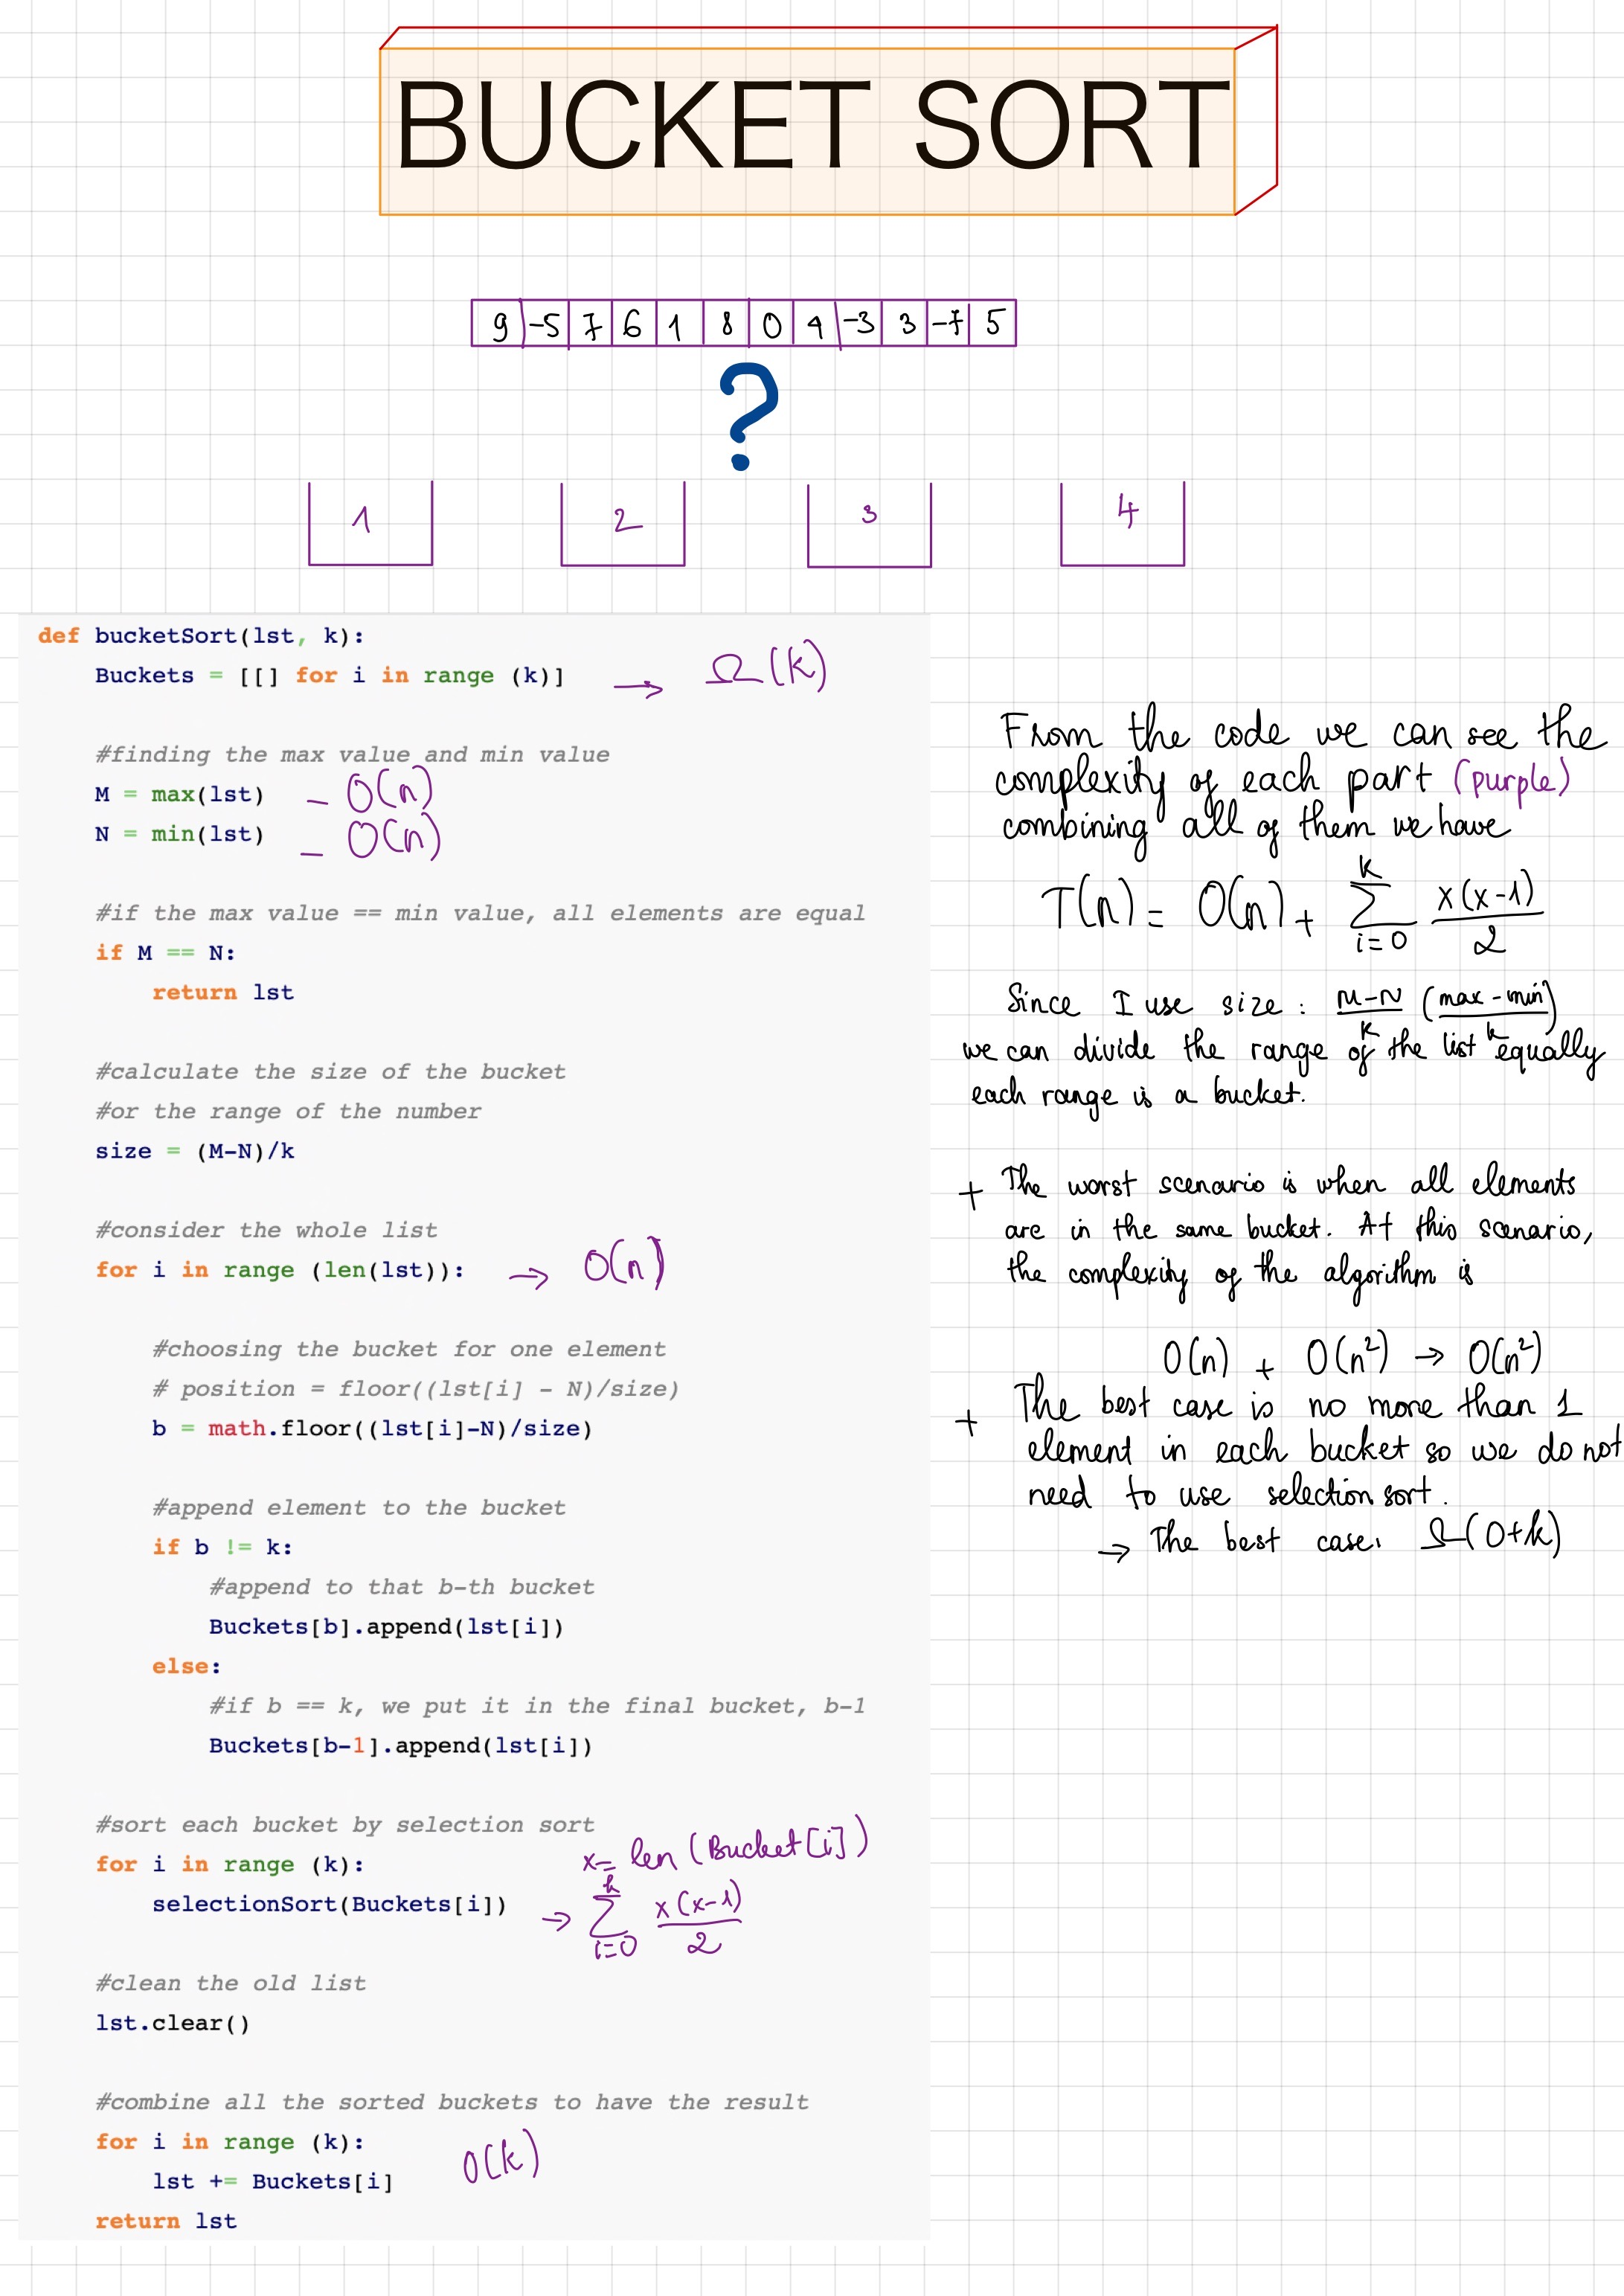

In [33]:
Image("IMG_0455.JPG")

**The complexity of extended bucket sort**

- Worst-case: $O(n^2) $
- Best case:  $\Omega(n+k)$

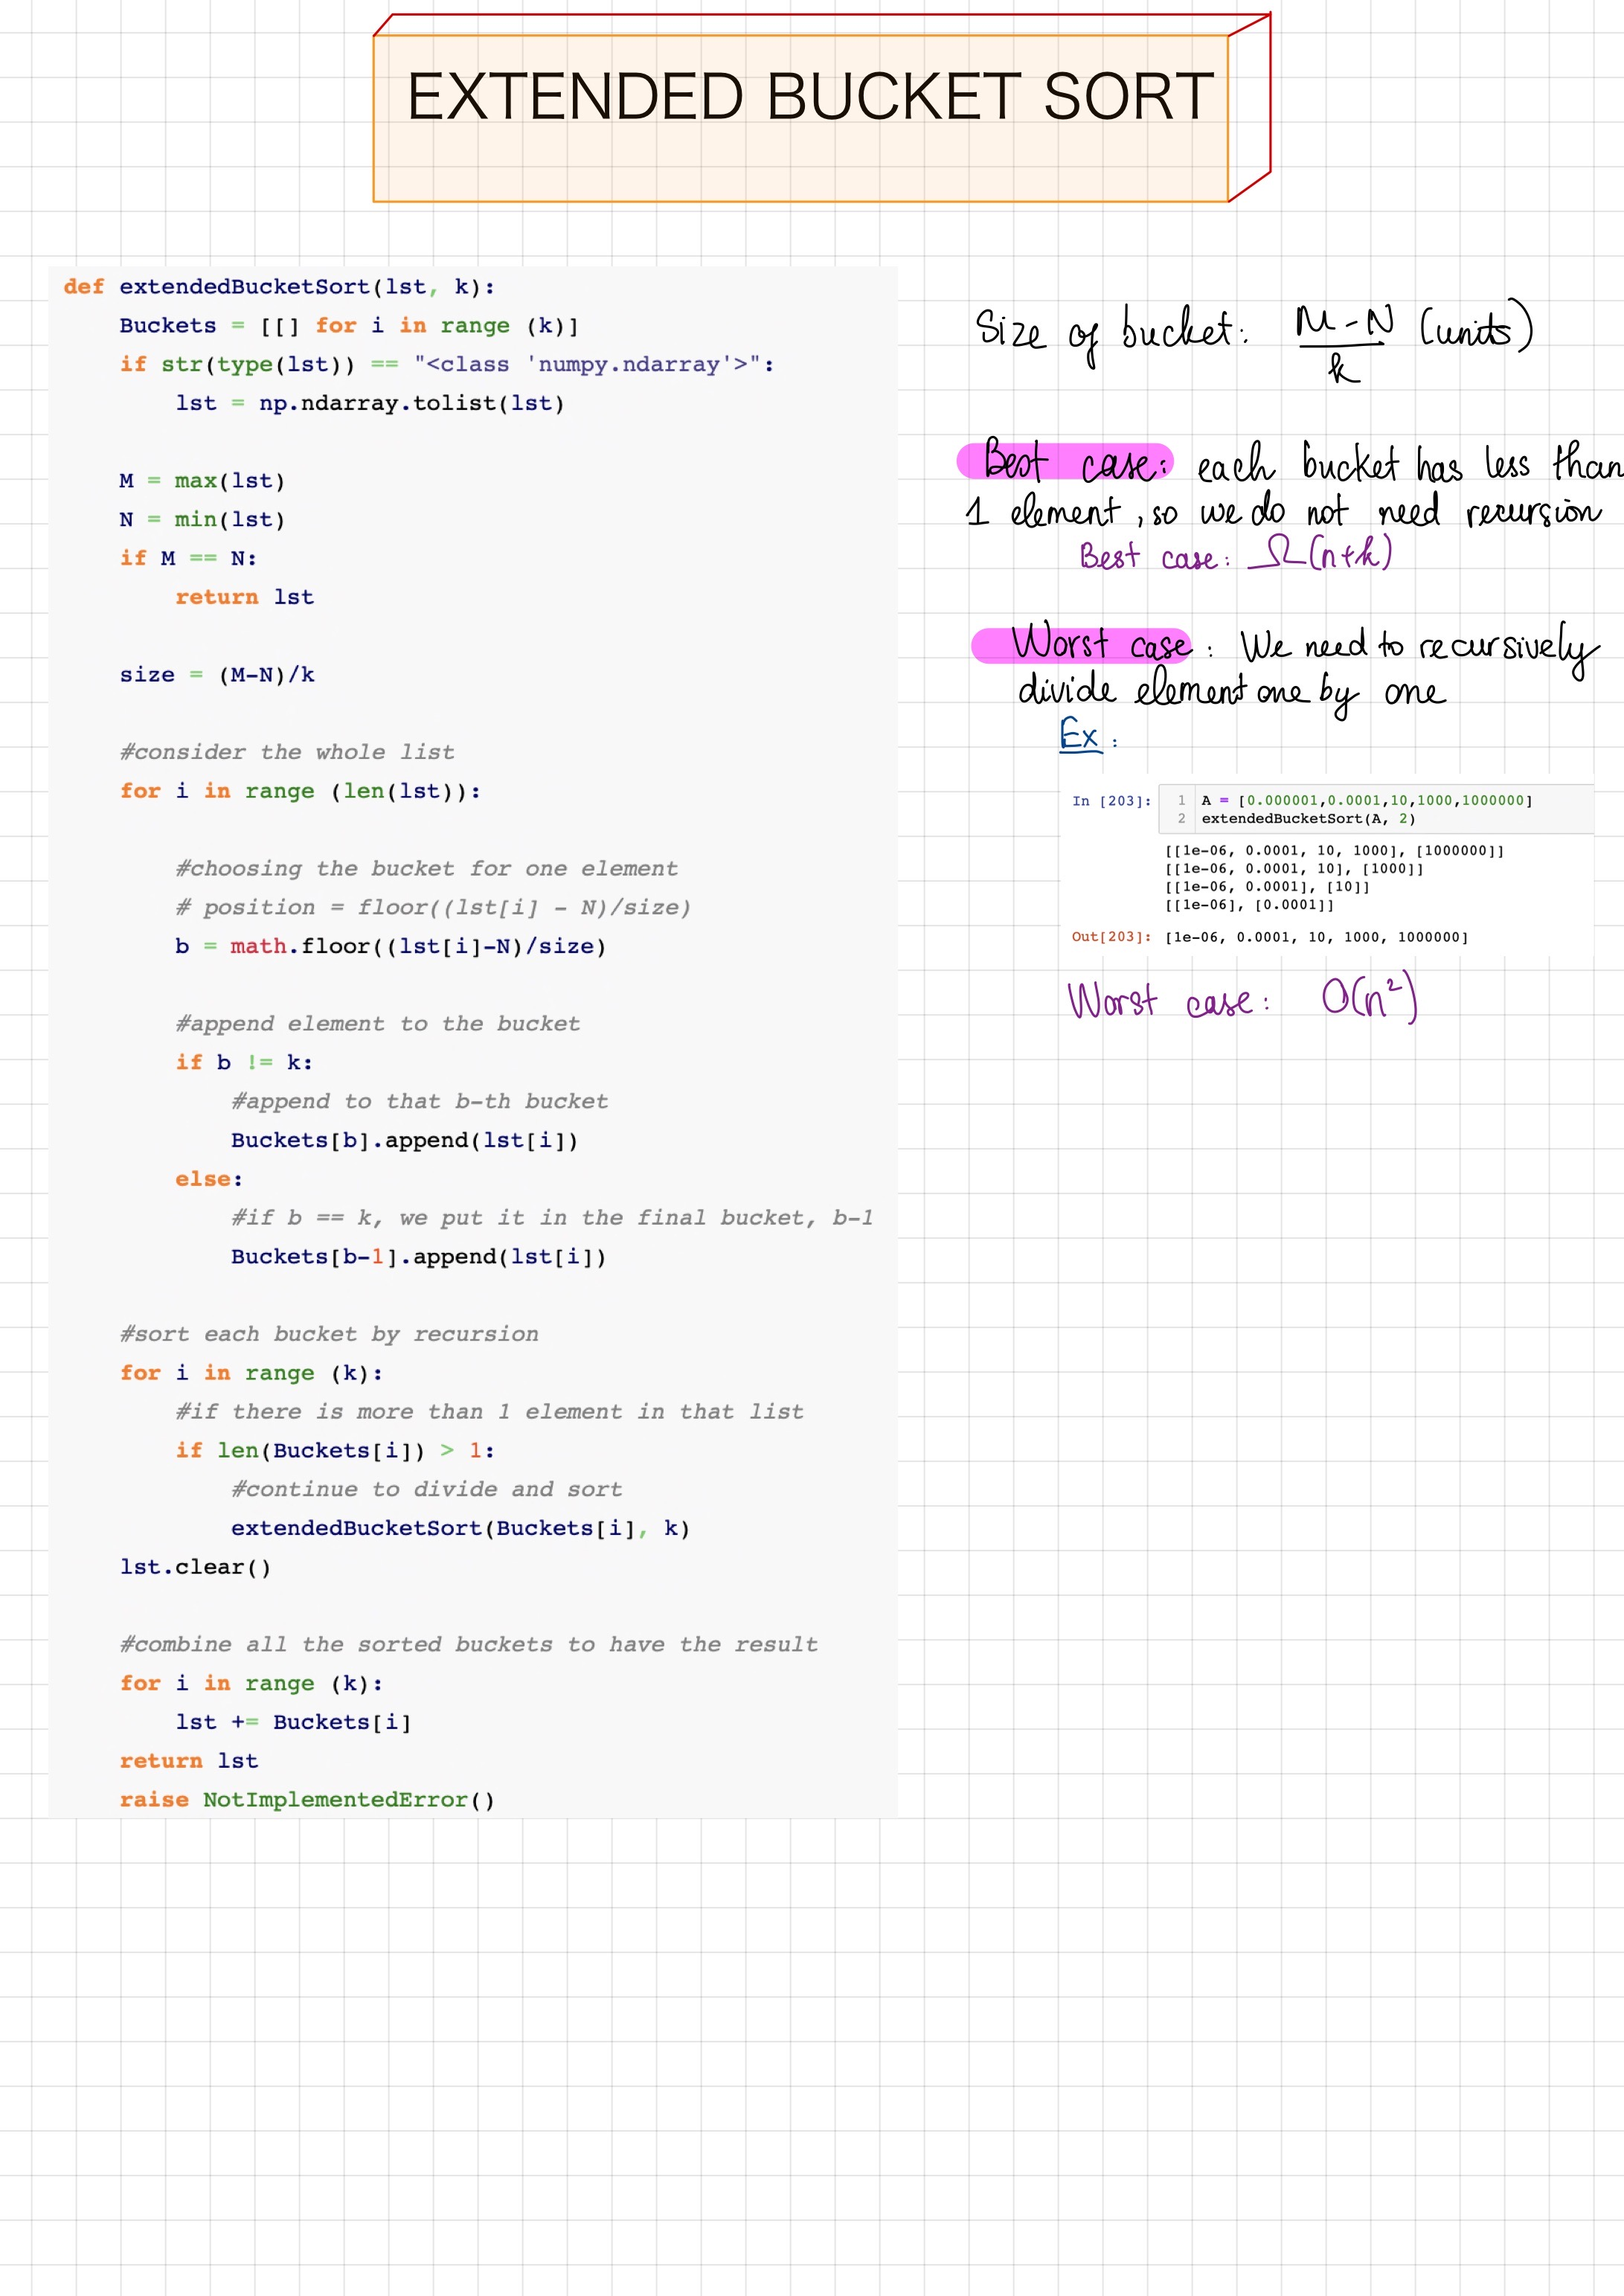

In [34]:
Image("IMG_0454.JPG")

-----------


**Algorithm with step counter**

In [35]:
#bucket sort
def bucketSort(lst, k):
    """Implements BucketSort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    global step
    
    #create buckets
    step += k
    Buckets = [[] for i in range (k)]
    
    #find min and max
    step += 2 * (len(lst))
    M = max(lst)
    N = min(lst)
    
    if M == N:
        #increase
        step += 1
        return lst
    
    #calculate size
    step += 1
    size = (M-N)/k
    
    for i in range (len(lst)):
        #increase i
        step += 1
        
        #calculate b
        b = math.floor((lst[i]-N)/size)
        step += 1
        
        #check and append
        step += 2
        if b != k:
            Buckets[b].append(lst[i])
        else:
            Buckets[b-1].append(lst[i])
            
    for i in range (k):
        step += 1
        selectionSort(Buckets[i])
        
    #clear the list
    step += 1
    lst = []
    
    #combine the list
    step += len(lst)
    for i in range (k):
        lst += Buckets[i]
    return lst

In [36]:
#extended bucket sort
def extendedBucketSort(lst, k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""

    global step
    #create buckets
    step += k
    Buckets = [[] for i in range (k)]
    
    #find min and max
    step += 2 * (len(lst))
    M = max(lst)
    N = min(lst)
    
    if M == N:
        #increase
        step += 1
        return lst
    
    #calculate size
    step += 1
    size = (M-N)/k
    
    for i in range (len(lst)):
        #increase i
        step += 1
        
        #calculate b
        b = math.floor((lst[i]-N)/size)
        step += 1
        
        #check and append
        step += 2
        if b != k:
            Buckets[b].append(lst[i])
        else:
            Buckets[b-1].append(lst[i])
            
    for i in range (k):
        step += 1
        if len(Buckets[i]) > 1:
            extendedBucketSort(Buckets[i], k)
        
    #clear the list
    step += 1
    lst = []
    
    #combine the list
    step += len(lst)
    for i in range (k):
        lst += Buckets[i]
    return lst

------

## Calculate steps and plot

In [37]:
#bucketsort
step_bucket = []
for k in range (1, 16):
    step = 0
    list_k = [i for i in range (100*k, 0, -1)]
    bucketSort(list_k, len(list_k) )
    step_bucket.append(step)
# print(step_bucket)

In [38]:
#extended bucket sort
step_extended_bucket = []
for k in range (1, 16):
    step = 0
    list_k = [i for i in range (100*k, 0, -1)]
    extendedBucketSort(list_k, len(list_k))
    step_extended_bucket.append(step)
# print(step_extended_bucket)

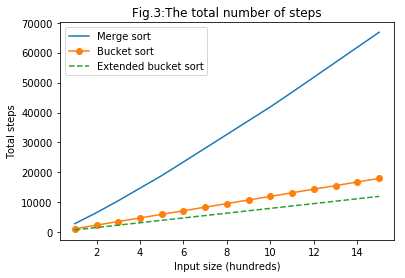

In [39]:
size = [i for i in range (1,16)]
plt.plot(size, step_merge, label = "Merge sort")
plt.plot(size, step_bucket, label = "Bucket sort ", marker='o')
plt.plot(size, step_extended_bucket, label = "Extended bucket sort", linestyle = 'dashed')
plt.xlabel('Input size (hundreds)')
plt.ylabel('Total steps')
plt.title('Fig.3:The total number of steps')
plt.legend()
plt.show()

------


## Calculate running time and plot

Structure of simulation

- Step 0: Import time 
- Step 1: Run the function 100 times to get 100 time counters of the same input, put them to a list
- Step 2: Calculate the average of 100 times 
- Step 3: Increase the input size and comback to step 1

In [40]:
#bucket sort
time_bucket = []

for k in range (1, 21):
    bucket = 0
    for i in range (100):
        list_k = [i for i in range (100*k, 0, -1)]
        start = time.time()
        bucketSort(list_k, len(list_k))
        end = time.time()
        bucket += (end- start)
    time_bucket.append(bucket/100)
# print(time_bucket)

In [41]:
#extended bucket sort
extended_bucket = []

for k in range (1, 21):
    bucket = 0
    for i in range (100):
        list_k = [i for i in range (100*k, 0, -1)]
        start = time.time()
        extendedBucketSort(list_k, len(list_k))
        end = time.time()
        bucket += (end- start)
    extended_bucket.append(bucket/100)
# print(extended_bucket)

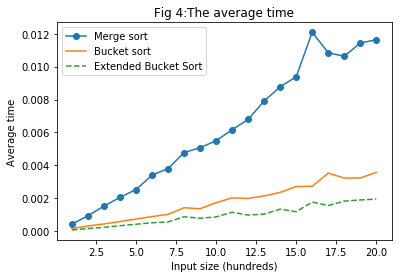

In [42]:
size = [i for i in range (1,21)]
plt.plot(size, regular_merge, label = "Merge sort ", marker='o')
plt.plot(size, time_bucket, label = "Bucket sort")
plt.plot(size, extended_bucket, label = "Extended Bucket Sort", linestyle = "dashed")
plt.xlabel('Input size (hundreds)')
plt.ylabel('Average time')
plt.title('Fig 4:The average time')
plt.legend()
plt.show()

-----


## The plot of 5 algorithms

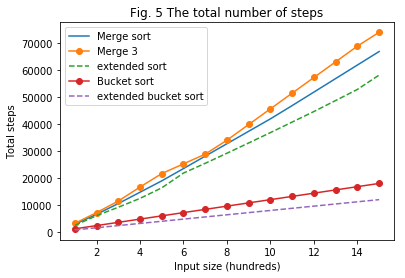

In [50]:
size = [i for i in range (1,16)]
plt.plot(size, step_merge, label = "Merge sort")
plt.plot(size, step_merge_3, label = "Merge 3 ", marker='o')
plt.plot(size, step_extended_merge, label = "extended sort", linestyle = 'dashed')
plt.plot(size, step_bucket, label = "Bucket sort ", marker='o')
plt.plot(size, step_extended_bucket, label = "extended bucket sort", linestyle = 'dashed')
plt.xlabel('Input size (hundreds)')
plt.ylabel('Total steps')
plt.title('Fig. 5 The total number of steps')
plt.legend()
plt.show()

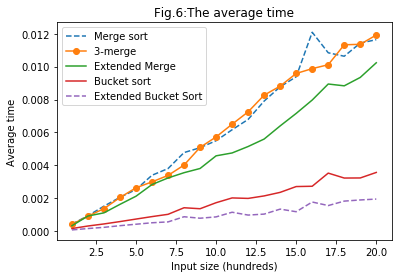

In [51]:
size = [i for i in range (1,21)]
plt.plot(size, regular_merge, label = "Merge sort",linestyle = 'dashed')
plt.plot(size, merge_3, label = "3-merge ", marker='o')
plt.plot(size, extended_merge_3, label = "Extended Merge")
plt.plot(size, time_bucket, label = "Bucket sort")
plt.plot(size, extended_bucket, label = "Extended Bucket Sort", linestyle = 'dashed')
plt.xlabel('Input size (hundreds)')
plt.ylabel('Average time')
plt.title('Fig.6:The average time')
plt.legend()
plt.show()

-----------

## Optimize the bucket sort and the extended bucket sort

In [52]:
bucket_time_i = []
bucket_extended_i = []
size = [ i for i in range (2,102)]
for i in range (2,102):
    list_k = [i for i in range (1000,0,-1)]
    start = time.time()
    bucketSort(list_k, i)
    end = time.time()
    bucket_time_i.append(end-start)

for i in range (2,102):
    list_k = [i for i in range (1000,0,-1)]
    start = time.time()
    extendedBucketSort(list_k, i)
    end = time.time()
    bucket_extended_i.append(end-start)

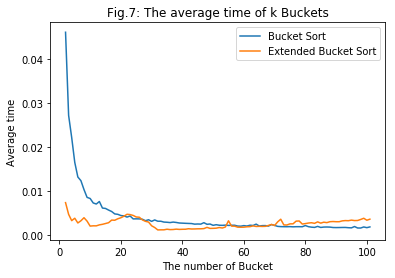

In [53]:
plt.plot(size, bucket_time_i, label = "Bucket Sort")
plt.plot(size, bucket_extended_i, label = "Extended Bucket Sort")
plt.legend()
plt.xlabel('The number of Bucket')
plt.ylabel('Average time')
plt.title('Fig.7: The average time of k Buckets')
plt.show()

-------


## Compare the time complexity from theoretical result and practical result

Time complexity based on theoretical result

| Algorithms            | Worst-case            | Best-case               | Average         |
|-----------------------|-----------------------|-------------------------|-------------------------|
| Merge sort            | $O(n *log(n))$        | $\Omega(n *log(n))$     | $\Theta(n *log(n))$     |
| Bucket Sort           | $O(n^2)$              | $\Omega(n + k)$         |                         |
| Extended Bucket Sort  | $O(n^2)$              | $\Omega(n + k)$ |  |

- Based on the table and explanation above, we can conclude that time complexity of the three algorithm:

                Megre sort > Bucket Sort > Extended Bucket Sort


- Based on Figure 3 and Figure 4, we see the same order in both number of steps and average time


- The complexity of Bucket Sort depends on the value of $k$. Since the question input is the len(lst) so we got the smallest time (Fig 7). 


- The number of buckets in extended bucket sort is bigger than 1 since we need to stop the resursion.


- The worst scenario of extended bucket sort is when almost elements are in the same bucket and we need to divide them one by one. For example: [0.1,0,2,1,2,10000,10000000,100000000]. The case I provided for the extended bucket sort is still easy for it. The complexity of the Extended Bucket Sort really depends on the input

-----

## [Optional challenge] Question 8 (#SortingAlgorithm and/or #ComputationalCritique) 

Implement k-way merge sort, where the user specifies k. Develop and run experiments to support a hypothesis about the “best” value of k.

In [54]:
#function to merge sublist
def kWayMerge(lst, sublist):
    
    "lst: the orginal list, sublist: a list that contain the divided sublists"
    
    #infinity
    INF = float("inf")
    
    #the list to save the pointer of each sublists
    var = [0 for i in range (len(sublist))] 
    
    #append infinity to the end of each sublist
    for i in range (len(sublist)):
        sublist[i].append(INF)
    
    #the pointer of lst
    c = 0
    
    while True:
        
        #the list to have current value of the pointer of each sublist
        temp = []
        
        #append the value of the pointer of each sublist to the temp
        for i in range (len(var)):
            temp.append(sublist[i][var[i]])
            
        #finding the min
        #if min(temp) == INF, means all pointers are at the end
        if min(temp) != INF:
            
            #replace the lst[pointer] = min of the temp
            lst[c] = min(temp)
        else:
            
            #if min(temp) == INF, means all pointers are at the end
            return lst
        
        #find the position of the min to increase pointer
        for i in range (len(temp)):
            
            #if that number is smallest
            if temp[i] == lst[c]:
                #increase the pointer
                var[i] += 1
                break

        #increase the pointer of the lst
        c += 1

#function to divide
def kWayMergeSort(lst, k):
    n = len(lst)
    
    #foundation condition to break recursion
    if n <= 1:
        return lst
    
    #set pointer to slice the list
    begin = 0
    end = 0
    
    #to save sublists
    sublist = []
    
    #slice the list
    if n >= k:
        
        #Modulo
        mod = n % k
        
        #start divide to k sublists
        for i in range (k):
            
            #the step size
            Range = n//k
            
            #if i < mod, we increase size by 1 to slice the list more equally
            if i < mod:
                Range += 1
            
            #if begin+ Range < len(lst) --> end = begin + Range ( slice with Range elements)
            end = min(len(lst),begin + Range)
            
            #slice the list and append to sublist
            sublist.append(lst[begin:end])
            
            #move the pointer to end position
            begin = end
            
    else:
        #if n < k, the number of elements are less than the bucket
        #each bucket has 1 element
        for i in range (n):
            sublist.append([lst[i]])
    
    #divide recursively until 1 element
    for i in range (min(n,k)):
        if len(sublist[i]) >1:
            kWayMergeSort(sublist[i], k)
    
    #merge the sublist
    kWayMerge(lst, sublist)
    
    return lst

In [55]:
B = [random.random() for i in range (100)]
C = B[:]
assert(kWayMergeSort(B, 4) == bucketSort(C, len(C)))

Hypothesis: The "best" value of k will provide the shortest time and the bigger k is, the shorter complexity is

In [58]:
def simulate_kWay(k):
    lst = [i for i in range (100,0,-1)]
    t = []
    for i in range (100):
        start = time.time()
        kWayMergeSort(lst, k)
        end = time.time()
        t.append(end-start)
    return sum(t)/100
res = []
size = []
for k in range (2, 100):
    size.append(k)
    res.append(simulate_kWay(k))

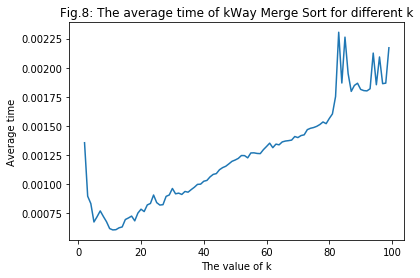

In [59]:
plt.plot(size, res)
plt.xlabel('The value of k')
plt.ylabel('Average time')
plt.title('Fig.8: The average time of kWay Merge Sort for different k')
plt.show()

**Explanation**
- Hypothesis: If there are more buckets, the algorithm will run faster (the time complexity decreases when k increases)
    - Figure 8 is a proof that hypothesis 1 is wrong.
    - In question 6, even though we can see that 3 ways merge sort is faster than the regular merge but we should not conclude that the hypothesis 1 is true (inductive argument)
    - The problem of dividing more sublists, we need more steps and time to find the minimum for each time. 
        - For the regular merge sort, each comparison is $\Omega(1)$. 
        - For the 3 ways merge sort, each comparison is $\Omega(2)$
        - For the k ways merge sort, each comparison is $(k-1)!$
    - As a result, the hypothesis is wrong and we should not pick a random value for k to have (possible) shorter time.

- This algorithms has the connection with the extended bucket sort since we both use the recursive and k sublists to divide the list. The one that makes this algorithm will be slower than the extended bucket sort is the comparison. While in extended bucket sort, we put the number to it place, but in the kWayMergeSort, we need function merge to compare and give it the right position.

------------

## HC Footnotes

## #optimization:

- My problem: How can I choose the suitable threshold to combine the selection sort and three way merge sort.

- My goal: Finding the worst of best cases that it is better to use solution sort than using merge sort.

- The optimized quantity: time complexity, step counters

- The possible approach:

    - Using the computer to run all the possible value of $a$ and choose the best "a". However, this approach is complex and takes a lot of time and space to solve. As a result, I did not choose it
    
    - Using Mathematic equation to solve the problem. I choose this because it is easy to understand and explain about the equation. The equation both can be checked by hand or computer. I only choose to deal with smaller size of input, when there are few elements in sublists and we need to make decision whether we use selection sort or three way merge sort
    
    - One outstandning note I had is the equation for complexity. Normally, the time complexity of selection sort is $O(n^2)$ when n is big enough. However, the equation I working with need to be a small value of $n$. As a result, I choose to calculate the complexity of selection sort and three way merge sort.
    
    - Solving the equation is good but choosing the one that can representative the process is more important. I choose $a=6$ because that is the worst best-cases. If $a<6$, the time complexity will be smaller but I want to represent the upper bound line for the extended merge sort with good value of $a$

- Choosing the right $a$ is important since it helps me save a lot of time and improve my performance. 

## #induction
- One big question: Should we increase the k in k-way merge sort to have smaller time complexity?

- An inductive argument: Because the 3-way merge sort is better than regular merge sort, we should increase the k to have smaller time.

- This is a typical generalize induction and I think it should be strongly emphasized because it is an important key to optimize the merge sort. The regular merge sort and three way merge sort are part of many choices and taking that as an example to make the answer plausible is wrong.

- By recognizing the inductive argument, it helps me carefully answer or have any conclusion for the big question.

## #algorithms

- Algorithm plays an important role in this assignment to run the code. I learn a lot from divide-and-conquer tools and using Python to write code from pseudocode.
- Even though I downloaded the new version, I accidentally work on the old version from the beginning. This is a challenge for me since the bucket sort algorithm from the old version is only right for the positive integer input.
- When I tested the algorithm and figured out the problem, I solved the problem by myself. By starting write down step by step and break it down to smaller parts, I can write the code by myself and run the code effectively.

- I also add all the comment for the code to explain the code better and using image to visualize the algorithms

## #responsibility

- In this assignment, I totally work on my own to code and run the function. But I do help other by explaining for them the logic of coding as I understand that helping other by giving them my code is prohibited.

- I plan to do the assignment and ask questions if necessary. Copying the code of other is not the thing I did. When I have problem with code, I try to dig deep to find the bug by myself. I also use some online test to check my algorithm whether it can run in different cases. 